# Introduction

The data was obtained from a dataset where subjects were instructed to perform a kinaesthetic motor imagery of the right hand and to find their own strategy to control and bring the ball to the target was performed. 

The experimental protocol consisted of 6 EEG-fMRI runs with a 20s block design alternating rest and task:

- motor localizer run (task-motorloc) - 8 blocks X (20s rest+20 s task)
- motor imagery run without NF (task-MIpre) -5 blocks X (20s rest+20 s task)
- three NF runs with different NF conditions (task-eegNF, task-fmriNF, task-eegfmriNF) occurring in random order- 10 blocks X (20s rest+20 s task)
- motor imagery run without NF (task-MIpost) - 5 blocks X (20s rest+20 s task)

These data was analyzed in different studies:
  __( RESUMEN DE TODOS LOS PUNTOS Y PROTOCOLOS DE NUESTROS ARTICULO )__

## Objectives

The main objective of this study consists of an in-depth analysis of the database provided, the contents of which are detailed in the introduction. Since our database is composed of EEG and fMRI, we will start this study with an individual analysis for each of these neuroimaging techniques. The content of the first part will be based on the study of the different epochs that can be extracted from electroencephalographic signals. On the other hand, as far as fMRI is concerned, the slices belonging to rest and task will be treated separately in order to analyse the differences they present. In addition, a classification of the database will be made in order to differentiate autonomously between both types of activity. 

### falta eeg



## Imports

In [2]:
import mne
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel as nib
from nibabel import Nifti1Image
from matplotlib.pyplot import figure
from matplotlib import patches



import nilearn
from nilearn.datasets import fetch_spm_auditory
from nilearn import image
from nilearn import plotting
from nilearn import masking
from nilearn.input_data import NiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure
import pandas as pd


from os.path import join as opj
from nibabel.testing import data_path
import json
from nipype.interfaces.spm import Level1Design, EstimateModel, EstimateContrast, Normalize12
#tpm_img ='/home/ubuntu/Documents/MATLAB/spm12/tpm/TPM.nii' # normalization template

from nipype.algorithms.modelgen import SpecifySPMModel
from nipype.interfaces.utility import Function, IdentityInterface
from nipype.interfaces.io import SelectFiles, DataSink
from nipype import Workflow, Node
#from bids.layout import BIDSLayout
from nipype.algorithms.misc import Gunzip

import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
import nibabel as nib
from nilearn import datasets
from nilearn.plotting import plot_epi, show
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.glm.first_level import FirstLevelModel
from nilearn import plotting
from nilearn.reporting import get_clusters_table
from nilearn import maskers
from nilearn import input_data
from nilearn.input_data import NiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure

from dipy.io.image import load_nifti

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.utils.validation import column_or_1d
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

220523-15:12:35,206 nipype.utils WARNING:
	 A newer version (1.8.1) of nipy/nipype is available. You are using 1.7.1


## Anatomical information

In [3]:
def Anatomical_representation (data_folder,subject_code):
     for i in  subject_code:
        print("Subject analyzed: {:.3f}".format(i))
        subject_folder='/sub-xp'
        String_contrinuation1='/anat/sub-xp'
        String_contrinuation2='_T1w.nii.gz'
        subject_codee=str(i)
        
        subject_data=data_folder+subject_folder+subject_codee+String_contrinuation1+subject_codee+String_contrinuation2
        
        img = nib.load(subject_data)
        img_data = img.get_fdata()
        print("The shape of the anatomical data is: ")
        print(img.shape)
        
        fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
        
        ax[0].imshow(img_data[69, :, :].T, origin='lower', cmap='gray')
        ax[0].set_xlabel('Second dim voxel coords.', fontsize=12)
        ax[0].set_ylabel('Third dim voxel coords', fontsize=12)
        ax[0].set_title('First dimension, slice nr. 70', fontsize=15)

        ax[1].imshow(img_data[:, 249, 0:512:2].T, origin='lower', cmap='gray')
        ax[1].set_xlabel('First dim voxel coords.', fontsize=12)
        ax[1].set_ylabel('Third dim voxel coords', fontsize=12)
        ax[1].set_title('Second dimension, slice nr. 250', fontsize=15)

        ax[2].imshow(img_data[:, 0:512:2, 249].T, origin='lower', cmap='gray')
        ax[2].set_xlabel('First dim voxel coords.', fontsize=12)
        ax[2].set_ylabel('Second dim voxel coords', fontsize=12)
        ax[2].set_title('Third dimension, slice nr. 250', fontsize=15)

        fig.tight_layout()
        print("\n")
        
        

Subject analyzed: 101.000
The shape of the anatomical data is: 
(176, 512, 512)


Subject analyzed: 106.000
The shape of the anatomical data is: 
(176, 512, 512)


Subject analyzed: 109.000
The shape of the anatomical data is: 
(176, 512, 512)




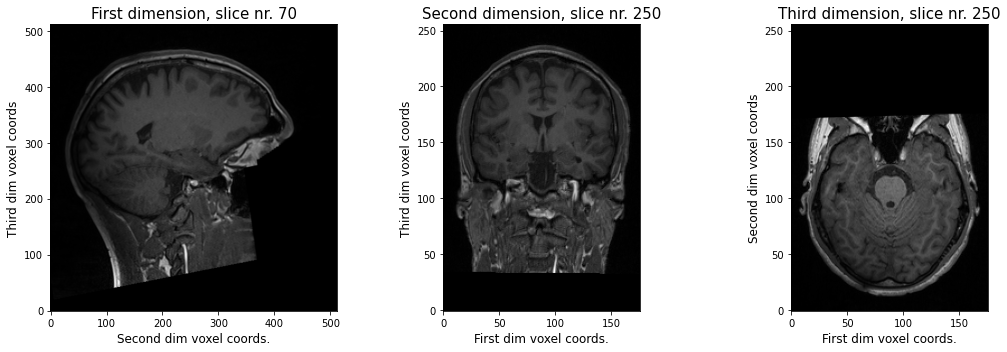

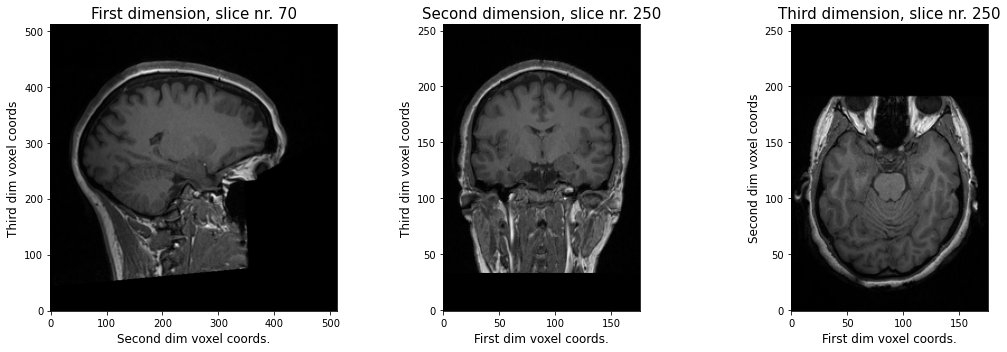

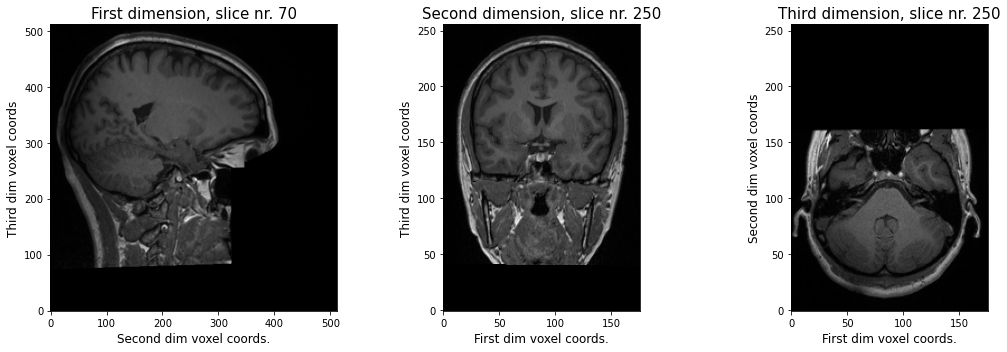

In [4]:
#Specify the particular path where the data that is wanted to be study is placed on your computer. 
data_folder = '/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project'
#data_folder = 'C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen'
#data_folder = 'C:/Users/Alex/Documents/UPC/Q2/Neuroimatge/Final Project/ds002336-download'
Anatomical_representation (data_folder,[101,106,109])



The first step was to analyze the images available, in the plots above, the MRI (T1) of three subjects of the cohort can be seen. Apparently, in this images no differences can be appreciate, as all participants were healthy subjects.

# fMRI

## Single subject and single protocol file (eegfmriNF) analysis



In order to explain the different processes that later will be applied to the whole database, the information of a single subject will be processed. To start with the analysis of the fMRI, the file where the subjected was provided with both eeg and fmri neurofeedback will be used. Also, we decided to incorporate in this first individual analysis the incorporation of the motoroloc file (where the patient had to move while doing the exercice) for comparison purposes. 

Epi plot from fMRI mean image


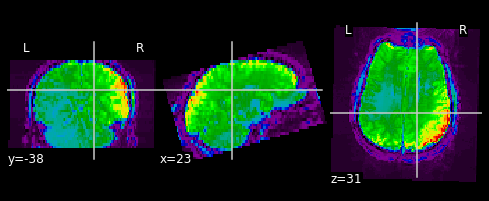

In [5]:
#subject_data = 'C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen/sub-xp101/func/sub-xp101_task-eegfmriNF_bold.nii.gz'
subject_data = '/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project/sub-xp101/func/sub-xp101_task-eegfmriNF_bold.nii.gz'

fmri_img= nib.load(subject_data)
mean_img = image.mean_img(fmri_img)
mask = masking.compute_epi_mask(mean_img)

#After computing the mask and the mean image, fmri-img is rewritten in numpy format
fmri_img, affine, img = load_nifti(subject_data , return_img=True)

print('Epi plot from fMRI mean image')
plot_epi(mean_img);


### Task - Rest separation

The fMRI image of every subject consists on different task - rest blocks. Since the events information is already provided, the separation of our image into two large distinct groups is possible to be done. Note that, depending on the file analysed, the times at which the different fMRI images are taken vary, as well as the duration times of each block.

In [6]:
#events_ = pd.read_table('C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen/task-eegfmriNF_events.tsv')
events_ = pd.read_table('/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project/task-eegfmriNF_events.tsv')

del events_['stim_file']

events=events_.replace({'Task-NF':'Task'})

events

onset  duration trial_type
0       2        20       Rest
1      22        20       Task
2      42        20       Rest
3      62        20       Task
4      82        20       Rest
5     102        20       Task
6     122        20       Rest
7     142        20       Task
8     162        20       Rest
9     182        20       Task
10    202        20       Rest
11    222        20       Task
12    242        20       Rest
13    262        20       Task
14    282        20       Rest
15    302        20       Task
16    322        20       Rest
17    342        20       Task
18    362        20       Rest
19    382        20       Task

In the table above the different trials are specify, and the onset and duration of each trial are shown. This table was useful in order to split the slides, taking into account that the repetition time (tr) between images was 2s. 

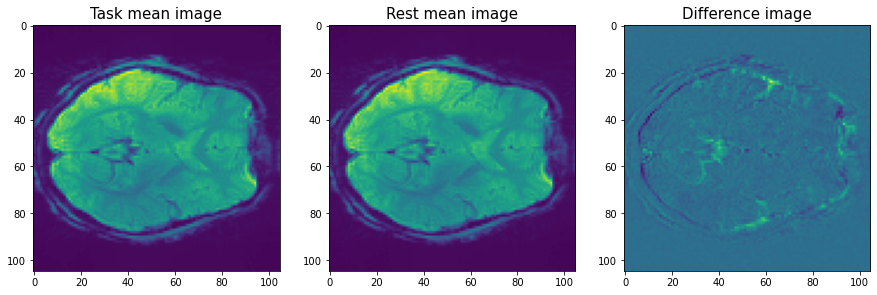

In [7]:
# Task and rest slides separated

fmri_rest=[]
fmri_rest_avg=[]
fmri_rest_todos=[]
fmri_task=[]
fmri_task_avg=[]
fmri_task_todos=[]
fmri_rest_todos_avg=np.zeros((106,106,32,10))
fmri_task_todos_avg=np.zeros((106,106,32,10))
count=0
count2=0
a=range(1,201,20)
for rest in a:
    fmri_rest_avg=fmri_img[:,:,:,rest+2:rest+8]
    fmri_rest_mean_avg=np.mean(fmri_rest_avg, axis=3)
    fmri_rest_todos_avg[:,:,:,count]=fmri_rest_mean_avg
    count+=1
    fmri_rest=fmri_img[:,:,:,rest:rest+10]
    if rest==1:
        fmri_rest_todos=fmri_rest
    else:
        fmri_rest_todos= np.concatenate((fmri_rest_todos,fmri_rest), axis=3)

for task in range(11,211,20):
    fmri_task_avg=fmri_img[:,:,:,task+2:task+8]
    fmri_task_mean_avg=np.mean(fmri_task_avg, axis=3)
    fmri_task_todos_avg[:,:,:,count2]=fmri_task_mean_avg
    count2+=1
    fmri_task=fmri_img[:,:,:,task:task+10]
    if task==11:
        fmri_task_todos=fmri_task
    else:
        fmri_task_todos= np.concatenate((fmri_task_todos,fmri_task), axis=3)
        
mean_img_rest_np=np.mean(fmri_rest_todos,axis=3)
mean_img_task_np=np.mean(fmri_task_todos,axis=3)
reference_image=mean_img_rest_np-mean_img_task_np

varx=slice(0, 105)
vary=slice(0, 105)
varz=14

fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].imshow(mean_img_task_np[varx,vary,varz])
ax[0].set_title('Task mean image', fontsize=15)
ax[1].imshow(mean_img_rest_np[varx,vary,varz])
ax[1].set_title('Rest mean image', fontsize=15)
ax[2].imshow(reference_image[varx,vary,varz])
ax[2].set_title('Difference image', fontsize=15);


After splitting and plotting the images of task and rest, apparently not much difference could be appreciated in the previously displayed 'averaging' of these two main blocks of activity. However, this little difference suggests that task and rest does not have the same impact on the subject. 

The voxels' areas (__marked__ on the figure representation made below) were used in order to see the voxel value evolution and be able to compare visually differences between task and rest.

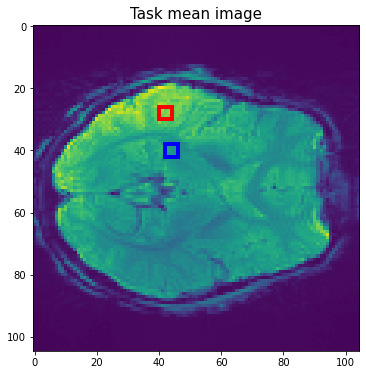

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(mean_img_task_np[varx,vary,varz])
ax.set_title('Task mean image', fontsize=15)
rect = patches.Rectangle((40, 26), 4, 4, linewidth=4, edgecolor='r', facecolor='none')
rect2 = patches.Rectangle((42, 38), 4, 4, linewidth=4, edgecolor='b', facecolor='none')
ax.add_patch(rect)
ax.add_patch(rect2)
plt.show()

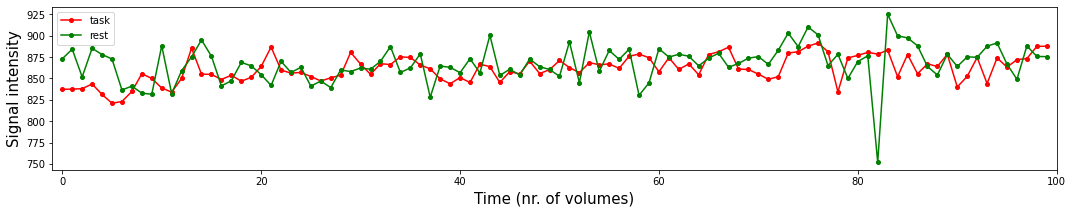

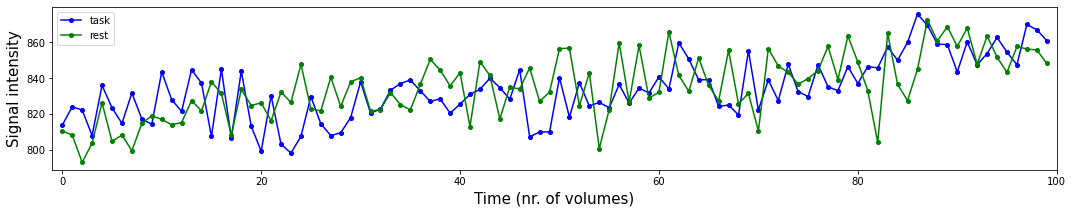

In [9]:
mid_vox_task = fmri_task_todos[40:42, 26:28, 14, :]
mid_vox_task =np.mean(mid_vox_task,axis=0)
mid_vox_task =np.mean(mid_vox_task,axis=0)
mid_vox_rest = fmri_rest_todos[40:42, 26:28, 14, :]
mid_vox_rest =np.mean(mid_vox_rest,axis=0)
mid_vox_rest =np.mean(mid_vox_rest,axis=0)

plt.figure(figsize=(18, 3))
plt.plot(mid_vox_task, 'o-', ms=4, color='r', label='task')
plt.plot(mid_vox_rest, 'o-', ms=4, color='g', label='rest')
plt.xlim(-1, mid_vox_task.size)
plt.ylabel('Signal intensity', fontsize=15)
plt.xlabel('Time (nr. of volumes)', fontsize=15)
plt.legend()
plt.show()

mid_vox_task = fmri_task_todos[42:44, 38:40, 14, :]  
mid_vox_task =np.mean(mid_vox_task,axis=0)
mid_vox_task =np.mean(mid_vox_task,axis=0)
mid_vox_rest = fmri_rest_todos[42:44, 38:40, 14, :] 
mid_vox_rest =np.mean(mid_vox_rest,axis=0)
mid_vox_rest =np.mean(mid_vox_rest,axis=0)

plt.figure(figsize=(18, 3))
plt.plot(mid_vox_task, 'o-', ms=4, color='b', label='task')
plt.plot(mid_vox_rest, 'o-', ms=4, color='g', label='rest')
plt.xlim(-1, mid_vox_task.size)
plt.ylabel('Signal intensity', fontsize=15)
plt.xlabel('Time (nr. of volumes)', fontsize=15)
plt.legend()
plt.show()

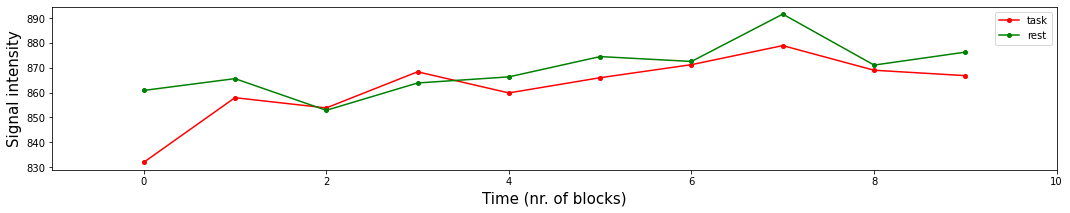

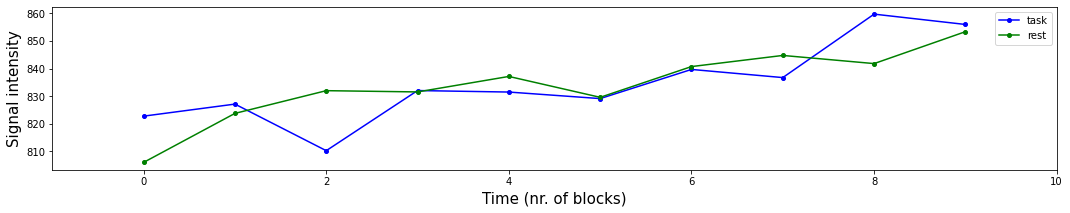

In [10]:
mid_vox_task = fmri_task_todos_avg[40:42, 26:28, 14, :]
mid_vox_task =np.mean(mid_vox_task,axis=0)
mid_vox_task =np.mean(mid_vox_task,axis=0)
mid_vox_rest = fmri_rest_todos_avg[40:42, 26:28, 14, :]
mid_vox_rest =np.mean(mid_vox_rest,axis=0)
mid_vox_rest =np.mean(mid_vox_rest,axis=0)

plt.figure(figsize=(18, 3))
plt.plot(mid_vox_task, 'o-', ms=4, color='r', label='task')
plt.plot(mid_vox_rest, 'o-', ms=4, color='g', label='rest')
plt.xlim(-1, mid_vox_task.size)
plt.ylabel('Signal intensity', fontsize=15)
plt.xlabel('Time (nr. of blocks)', fontsize=15)
plt.legend()
plt.show()

mid_vox_task = fmri_task_todos_avg[42:44, 38:40, 14, :]  
mid_vox_task =np.mean(mid_vox_task,axis=0)
mid_vox_task =np.mean(mid_vox_task,axis=0)
mid_vox_rest = fmri_rest_todos_avg[42:44, 38:40, 14, :] 
mid_vox_rest =np.mean(mid_vox_rest,axis=0)
mid_vox_rest =np.mean(mid_vox_rest,axis=0)

plt.figure(figsize=(18, 3))
plt.plot(mid_vox_task, 'o-', ms=4, color='b', label='task')
plt.plot(mid_vox_rest, 'o-', ms=4, color='g', label='rest')
plt.xlim(-1, mid_vox_task.size)
plt.ylabel('Signal intensity', fontsize=15)
plt.xlabel('Time (nr. of blocks)', fontsize=15)
plt.legend()
plt.show()

In the graphics above the differences of the signal intensity for the different events can be observed. Comparing them, there appears to be an increase in the baseline for both regions as well as for the task and rest sets. This could be the result of fatigue, since the experiment was conducted for long durations and therefore entailed mental exhaustion during its course.  

There is no noticeable difference in the degree of activity when the subject is performing a neurofeedback task. Firstly, although we have tried to take as reference areas those where we know in advance that should be activated, the variability of each patient is unique, and therefore, such differences in intensity may be occurring elsewhere (we will look at this later). Secondly, analysing pixels in a raw form, without applying any preprocessing, is not usually a good practice to denote differences, although it can provide useful information. 



### Extracting regions of activation

Furthermore, the more relevant regions changes from active to rest were represented. In order to compute the difference between the two regions (task - rest), it has been decided to calculate a first level model. This model is given as input the different image capture instants (time vector), as well as the event matrix. Formally, we have taken the first design matrix, because the model is implictily meant to for multiple runs.  

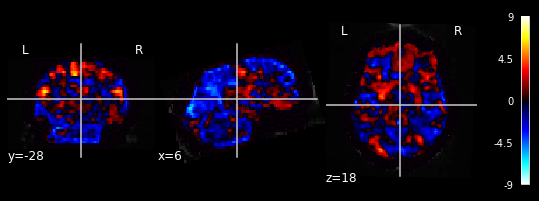

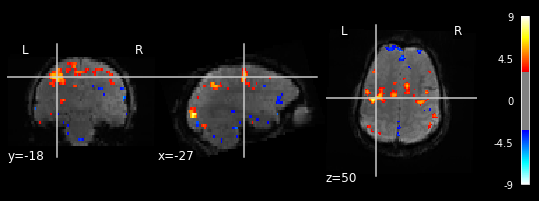

In [11]:
fmri_img = nib.load(subject_data)
mean_img = image.mean_img(fmri_img)
mask = masking.compute_epi_mask(mean_img)
fmri_img = image.clean_img(fmri_img, standardize=False)
fmri_img = image.smooth_img(fmri_img, 5.)

#events_ = pd.read_table('C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen/task-eegfmriNF_events.tsv')
events_ = pd.read_table('/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project/task-eegfmriNF_events.tsv')
del events_['stim_file']
events=events_.replace({'Task-NF':'Task'})

tr = 2  # repetition time of MRI scans is 2 seconds
n_scans = fmri_img.shape[3]  
frame_times = np.arange(n_scans) * tr  # here are the correspoding frame times

hrf_model = 'spm'
X1 = make_first_level_design_matrix(frame_times, events, drift_model='Cosine',
                                    hrf_model=hrf_model)
fmri_glm = FirstLevelModel(signal_scaling=False, mask_img=mask, minimize_memory=False)
fmri_glm = fmri_glm.fit(fmri_img, design_matrices=X1)

z_map = fmri_glm.compute_contrast('Task- Rest')
plotting.plot_stat_map(z_map, bg_img=mean_img);
plotting.plot_stat_map(z_map, bg_img=mean_img, threshold=3.1)

The figures shown above represents the most relevant differences between the two events studied. It is worth recalling at this point the purpose of the exercise, which consisted of performing different motor imagery tasks with neurofeedback. Since the activity to be imagined consisted of movements of the individual's right limbs, it makes sense that the main localization is on the contralateral side of the brain, over the motor area. 

(https://jbpe.sums.ac.ir/article_46458.html)

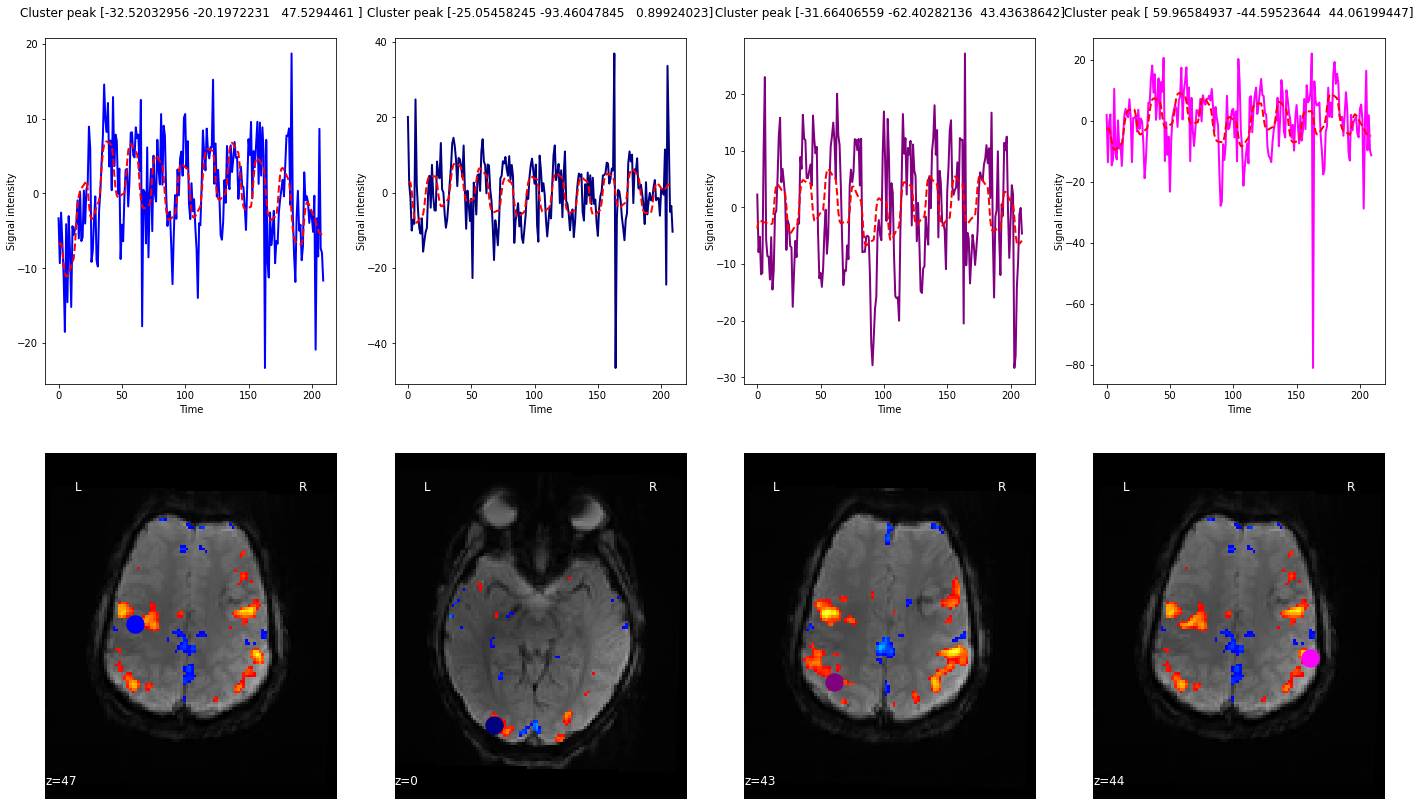

In [12]:
table = get_clusters_table(z_map, stat_threshold=3.1,
                           cluster_threshold=20).set_index('Cluster ID', drop=True)
# get the 4 largest clusters' max x, y, and z coordinates
coords = table.loc[range(1,5), ['X', 'Y', 'Z']].values
# extract time series from each coordinate
masker = input_data.NiftiSpheresMasker(coords)
real_timeseries = masker.fit_transform(fmri_img)
# The predicted time series was also extracted with GLM, it is useful to assess the quality of the model fit.
predicted_timeseries = masker.fit_transform(fmri_glm.predicted[0])

# colors for each of the clusters
colors = ['blue', 'navy', 'purple', 'magenta']
# plot the time series and corresponding locations
fig1, axs1 = plt.subplots(2, 4)
for i in range(0, 4):
    # plotting time series
    axs1[0, i].set_title('Cluster peak {}\n'.format(coords[i]))
    axs1[0, i].plot(real_timeseries[:, i], c=colors[i], lw=2)
    axs1[0, i].plot(predicted_timeseries[:, i], c='r', ls='--', lw=2)
    axs1[0, i].set_xlabel('Time')
    axs1[0, i].set_ylabel('Signal intensity', labelpad=0)
    # plotting image below the time series
    roi_img = plotting.plot_stat_map(
        z_map, cut_coords=[coords[i][2]], threshold=3.1, figure=fig1,
        axes=axs1[1, i], display_mode='z', colorbar=False, bg_img=mean_img)
    roi_img.add_markers([coords[i]], colors[i], 300)
fig1.set_size_inches(24, 14)


From the above calculations, the areas with the greatest difference in activation between the two events can be represented. These estimates can be seen for the subject studied in the figure shown above. As expected, the main activation zone is located in the left hemisphere, over the motor area, for the reasons that have been previously explained. In addition, there seems to be a strong occipital component, since the three preceding regions are located around this area. This denotes a state of concentration in regards of the different visual stimuli being processed. For this subject, the frontal part lacks relevant activity during the time of the study. 

### Atlas and correlation matrix 

[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________resample_img cache loaded - 0.1s, 0.0min
[Memory]1.7s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
(39, 39)


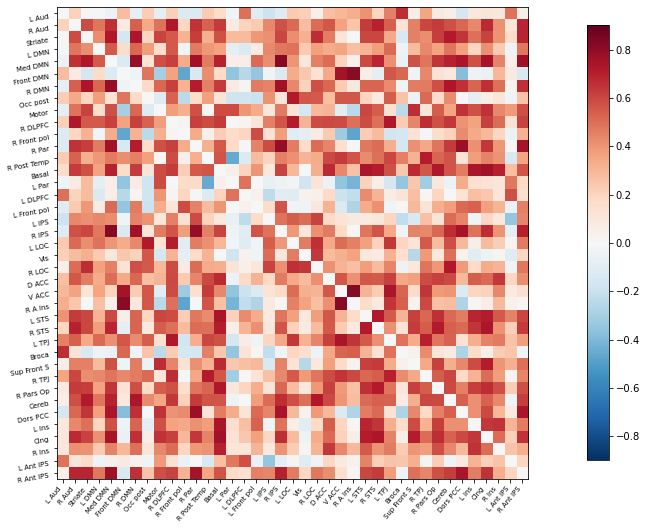

In [13]:
# Correlation matrix for the rest event

dataset = datasets.fetch_atlas_msdl() # Import atlas file
atlas_filename = dataset.maps
labels = dataset.labels

fmri_rest_todos=nib.Nifti1Image(fmri_rest_todos,affine)  # Tranform data to nifti files
fmri_task_todos=nib.Nifti1Image(fmri_task_todos,affine)  

masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True,
                         memory='nilearn_cache', verbose=5) # Create a mask

time_series = masker.fit_transform(fmri_rest_todos)
  
# Calculate the correlation matrix
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]


# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
fig = plt.figure(figsize=(10,10))
plotting.plot_matrix(correlation_matrix, labels=labels, colorbar=True,
                     vmax=0.9, vmin=-0.9,axes=fig.gca())

print(correlation_matrix.shape)

##### Resting state.

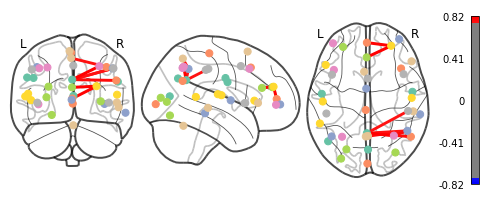

In [14]:
# Connectome map for the resting state

coords = dataset.region_coords

plotting.plot_connectome(correlation_matrix, coords,
                         edge_threshold="99%", colorbar=True)

plotting.show()

[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
[Memory]4.2s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


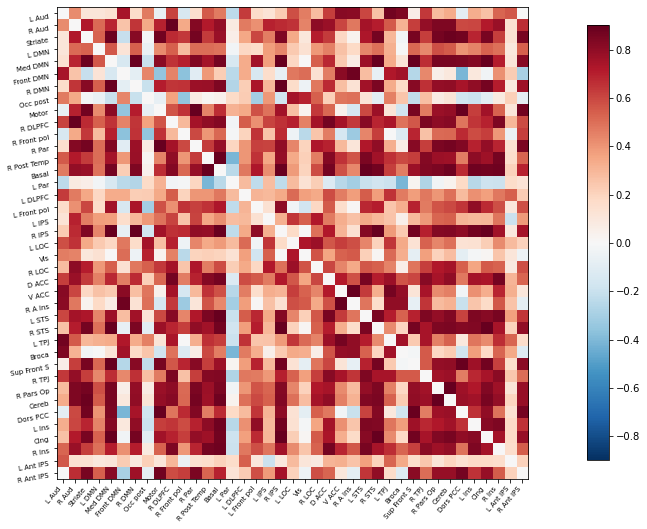

In [15]:
# Correlation matrix for the task event

time_series = masker.fit_transform(fmri_task_todos)

correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
fig = plt.figure(figsize=(10,10))
plotting.plot_matrix(correlation_matrix, labels=labels, colorbar=True,
                     vmax=0.9, vmin=-0.9,axes=fig.gca())

##### Task block

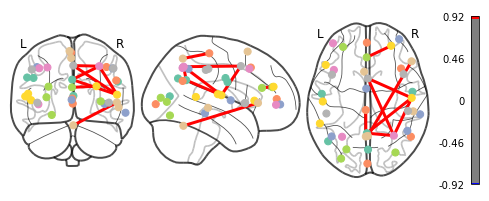

In [16]:
# Connectome map for the task state

coords = dataset.region_coords

plotting.plot_connectome(correlation_matrix, coords,
                         edge_threshold="99%", colorbar=True)

plotting.show()

When analyzing the correlation matrix and the connectome maps shown above, some difference can be observed. On the one hand, the correlation matrix of the task data shows a higher intensity than the one of the resting state, meaning that when doing a task some parts of the brain connect stronger. The same happen when analyzing the connectome maps, more relations between different areas can be seen in the task than in the rest event. Also, this connections seems to be unitateral right.

### Classification report

In order to examine the differences between the two study modules (again trying to differentiate the brain activity during task compared to rest), multiple classification models had been generated. In order to perform this analysis, in the first instance it has been decided to take the central slide of the transversal area of each of the time interval. This two-dimensional matrix is converted into a one-dimensional vector for the subsequent extraction of attributes with the principal component extraction method. 

In [17]:
X=np.zeros((200,11236))
Y=np.zeros((200,1))
for i in range(0,100,1):
    a=fmri_rest_todos[:,:,15,i]
    X[i,:]=a.flatten()
    Y[i,0]=0
for i in range(0,100,1):
    a=fmri_task_todos[:,:,15,i]
    X[i+100,:]=a.flatten()
    Y[i+100,0]=1
    
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.35)

n_components = 100

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

y_train = column_or_1d(np.ravel(y_train), warn=True)
y_test = column_or_1d(np.ravel(y_test), warn=True)

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
svm = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
svm = svm.fit(X_train_pca, y_train)

target_names=np.array(['Rest', 'Task'])
n_classes=2
print("\n")
print("Support Vector machine")
y_pred_svm = svm.predict(X_test_pca)
print(classification_report(y_test, y_pred_svm, target_names=target_names))
print(confusion_matrix(y_test, y_pred_svm, labels=(0,1)))
numerito=accuracy_score(y_test,y_pred_svm)*100
print("SVC accuracy: {:.3f}".format(numerito))
print("\n")

print("Linear Discriminant Analysis")
lda = LinearDiscriminantAnalysis()
lda = lda.fit(X_train_pca, y_train)
y_pred_lda = lda.predict(X_test_pca)
print(classification_report(y_test, y_pred_lda, target_names=target_names))
print(confusion_matrix(y_test, y_pred_lda, labels=(0,1)))
numerito=accuracy_score(y_test,y_pred_lda)*100
print("LDA accuracy: {:.3f}".format(numerito))
print("\n")

print("DecisionTreeClassifier")
dt = DecisionTreeClassifier()
dt = dt.fit(X_train_pca, y_train)
y_pred_dt = dt.predict(X_test_pca)
print(classification_report(y_test, y_pred_dt, target_names=target_names))
print(confusion_matrix(y_test, y_pred_dt, labels=(0,1)))
numerito=accuracy_score(y_test,y_pred_dt)*100
print("Decission Tree accuracy: {:.3f}".format(numerito))
print("\n")

print("Artificial neural network")
ann = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1)
ann.fit(X_train_pca, y_train)
y_pred_ann = ann.predict(X_test_pca)
print(classification_report(y_test, y_pred_ann, target_names=target_names))
print(confusion_matrix(y_test, y_pred_ann, labels=(0,1)))
numerito=accuracy_score(y_test,y_pred_ann)*100
print("ANN accuracy: {:.3f}".format(numerito))

TypeError: Cannot slice image objects; consider using `img.slicer[slice]` to generate a sliced image (see documentation for caveats) or slicing image array data with `img.dataobj[slice]` or `img.get_fdata()[slice]`

As can be seen, a total of four different models have been tested (support vector machine, linear discriminant analysis, decision trees and artificial neural network). Among the tested models, ANN outstands as the best having a consistent +75% of accuracy on every attempt. With three of the four models tested, the results obtained are good enough to affirm that there are quantifiable differences between task and rest that allow them to be differentiated. We will try to validate this hypothesis (not beeing able to reject the null hypothesis) in a subsequent study where all the subjects are included, as well as different files with their corresponding protocols. 

It is also remarkable the results obtained with the support vector machine, which is practically incapable of discerning between both types of events, placing all the results in a single group and therefore obtaining about 50% accuracy.

## All subjects and protocol files analysis

In this second subsection of the fMRI chapter, the previously explained theoretical bases will be applied to the database as a whole. For this purpose, different functions have been generated that iterate through the different folders and adapt certain points to the peculiarities of each file type. 

### Task - Rest analysis

In [18]:
data_folder = '/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project'
#data_folder = 'C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen'

In [19]:
def Act_Rrest (data_folder,subject_code,events_,fildd):
    for i in  subject_code:
        subject_folder='/sub-xp'
        String_contrinuation1='/func/sub-xp'
        String_contrinuation2=fildd
        subject_codee=str(i)
    
        subject_data=data_folder+subject_folder+subject_codee+String_contrinuation1+subject_codee+String_contrinuation2
        
        fmri_img = nib.load(subject_data)
        mean_img = image.mean_img(fmri_img) #media de los time points
        mask = masking.compute_epi_mask(mean_img)
        fmri_img = image.clean_img(fmri_img, standardize=False)
        fmri_img = image.smooth_img(fmri_img, 5.)
        
        if i == subject_code[0]:
            del events_['stim_file']
            events=events_.replace({'Task-NF':'Task'})
            print(events)
        
        tr = 2  # repetition time of MRI scans is 5 seconds
        n_scans = fmri_img.shape[3]  # the acquisition comprises 210 scans
        frame_times = np.arange(n_scans) * tr  # here are the correspoding frame times
        
        hrf_model = 'spm'
        X1 = make_first_level_design_matrix(frame_times, events, drift_model= "Cosine",
                                    hrf_model=hrf_model)
        
        fmri_glm = FirstLevelModel(signal_scaling=False, mask_img=mask, minimize_memory=False)
        fmri_glm = fmri_glm.fit(fmri_img, design_matrices=X1)
        
        z_map = fmri_glm.compute_contrast('Task- Rest') # els rois son els punts que mes canvien en el temps comparant task amb el rest
        
        
        plotting.plot_stat_map(z_map, bg_img=mean_img, threshold=3.1, title=subject_codee)
        
        
        
        table = get_clusters_table(z_map, stat_threshold=3.1,
                           cluster_threshold=20).set_index('Cluster ID', drop=True)
        

        # get the 4 largest clusters' max x, y, and z coordinates
        coords = table.loc[range(1,5), ['X', 'Y', 'Z']].values
        

        # extract time series from each coordinate
        masker = input_data.NiftiSpheresMasker(coords)
        real_timeseries = masker.fit_transform(fmri_img)
        # The predicted time series was also extracted with GLM, it is useful to assess the quality of the model fit.
        predicted_timeseries = masker.fit_transform(fmri_glm.predicted[0])

        
        # colors for each of the clusters
        colors = ['blue', 'navy', 'purple', 'magenta']
        # plot the time series and corresponding locations
        fig1, axs1 = plt.subplots(2, 4)
        for i in range(0, 4):
            # plotting time series
            axs1[0, i].set_title('Cluster peak {}\n'.format(coords[i]))
            axs1[0, i].plot(real_timeseries[:, i], c=colors[i], lw=2)
            axs1[0, i].plot(predicted_timeseries[:, i], c='r', ls='--', lw=2)
            axs1[0, i].set_xlabel('Time')
            axs1[0, i].set_ylabel('Signal intensity', labelpad=0)
            
            # plotting image below the time series
            roi_img = plotting.plot_stat_map(
                z_map, cut_coords=[coords[i][2]], threshold=3.1, figure=fig1,
                axes=axs1[1, i], display_mode='z', colorbar=False, bg_img=mean_img)
            roi_img.add_markers([coords[i]], colors[i], 300)
        fig1.set_size_inches(24, 14)

#### EEG - fMRI file

    onset  duration trial_type
0       2        20       Rest
1      22        20       Task
2      42        20       Rest
3      62        20       Task
4      82        20       Rest
5     102        20       Task
6     122        20       Rest
7     142        20       Task
8     162        20       Rest
9     182        20       Task
10    202        20       Rest
11    222        20       Task
12    242        20       Rest
13    262        20       Task
14    282        20       Rest
15    302        20       Task
16    322        20       Rest
17    342        20       Task
18    362        20       Rest
19    382        20       Task


KeyboardInterrupt: 

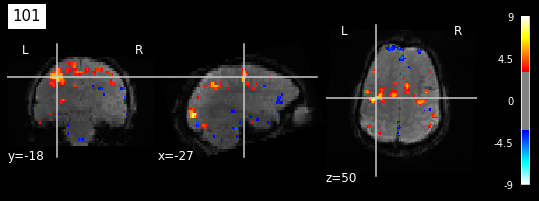

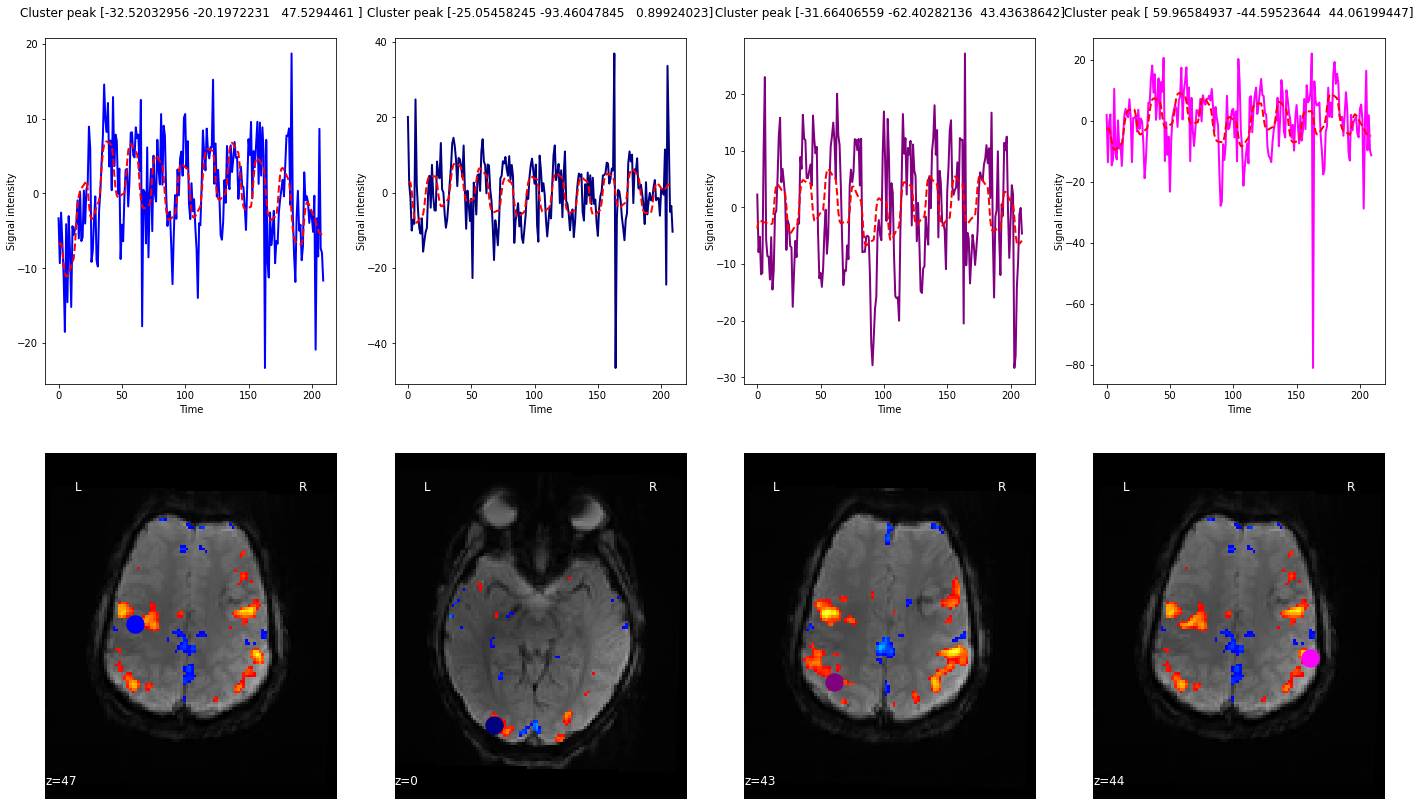

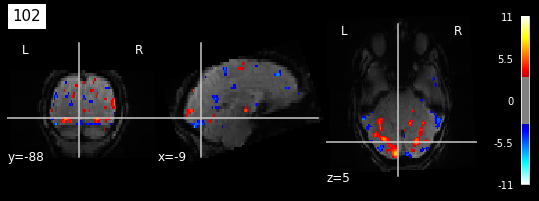

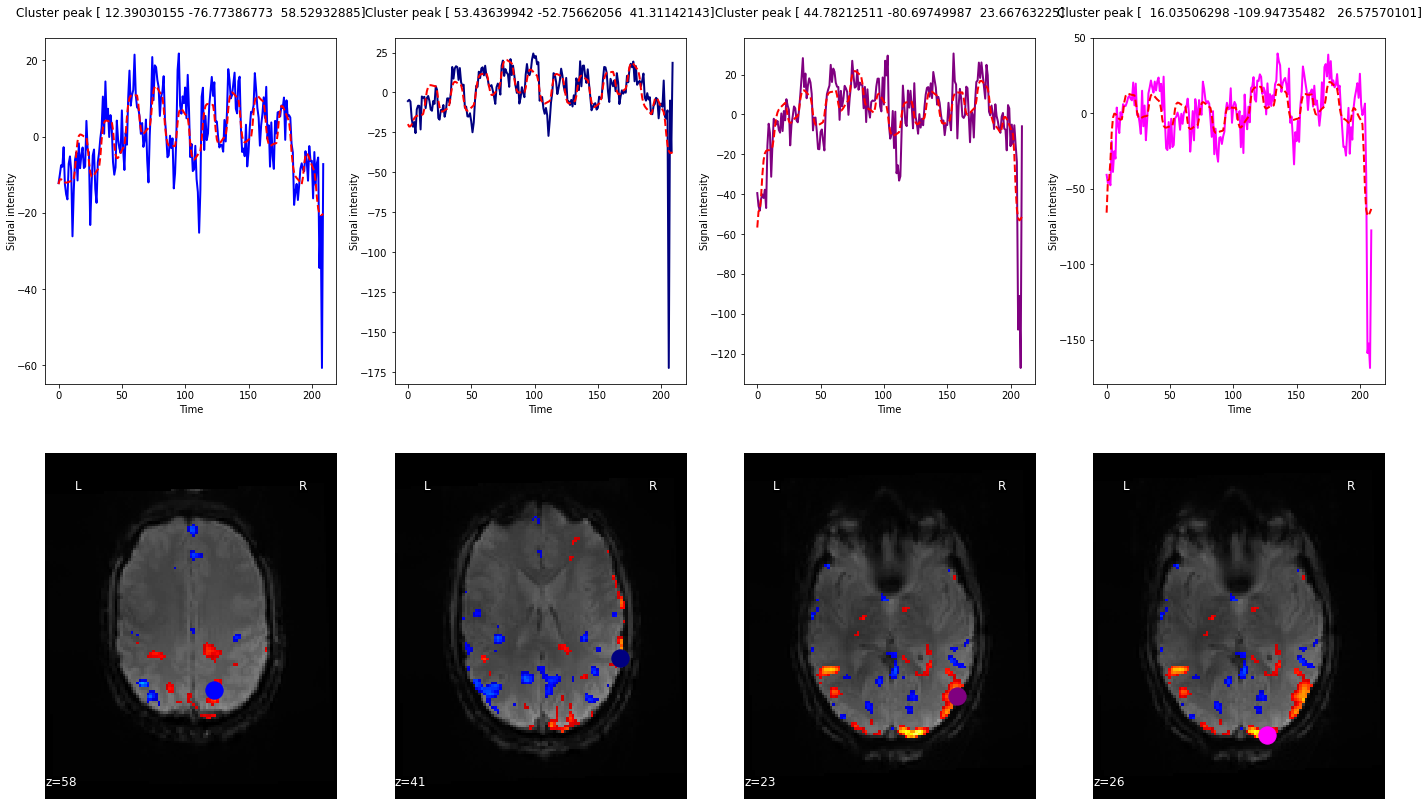

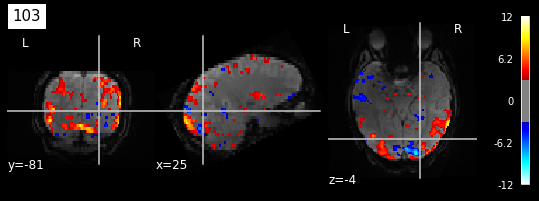

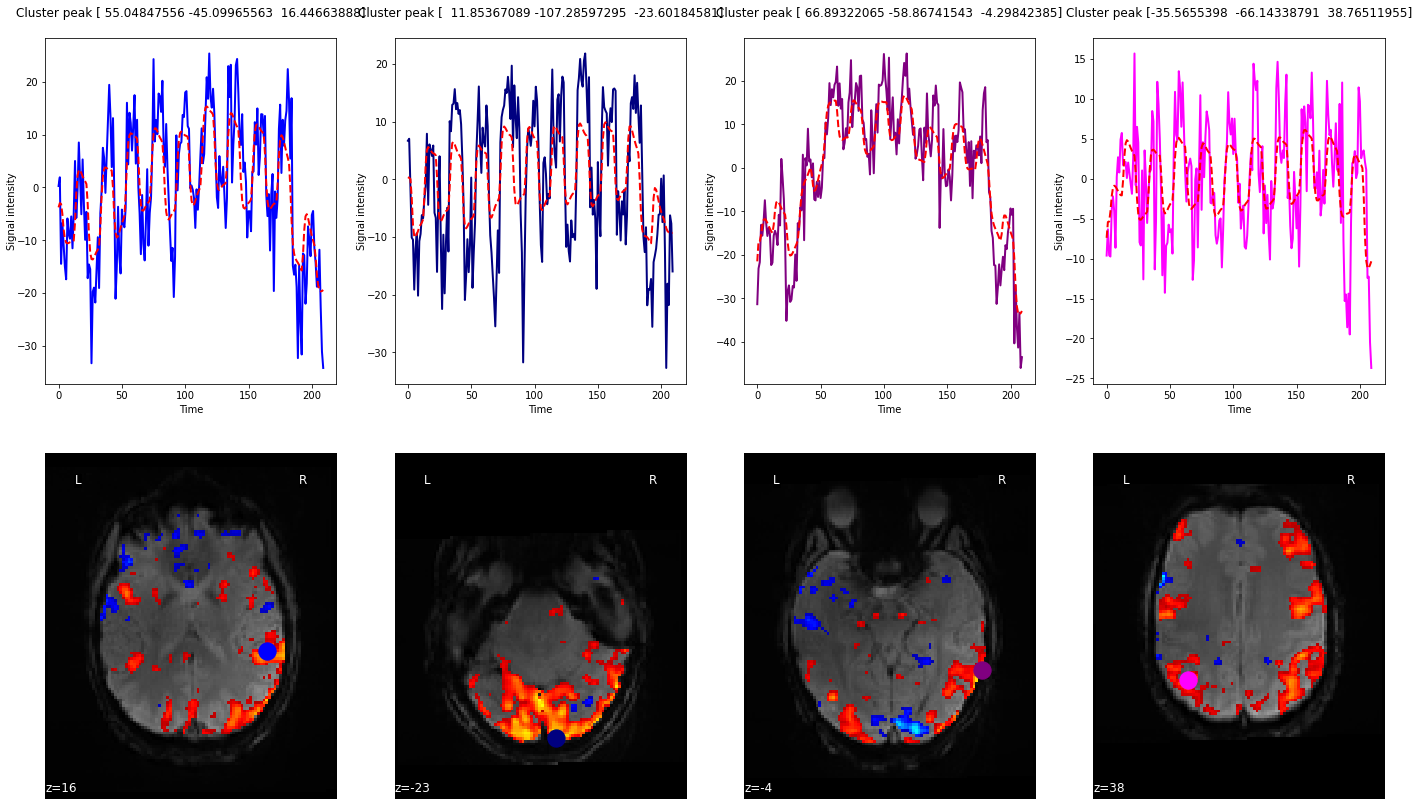

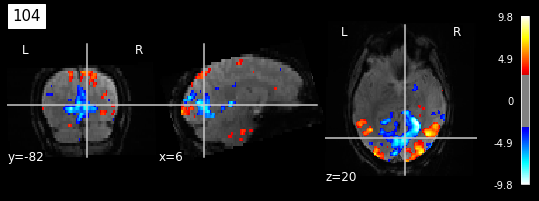

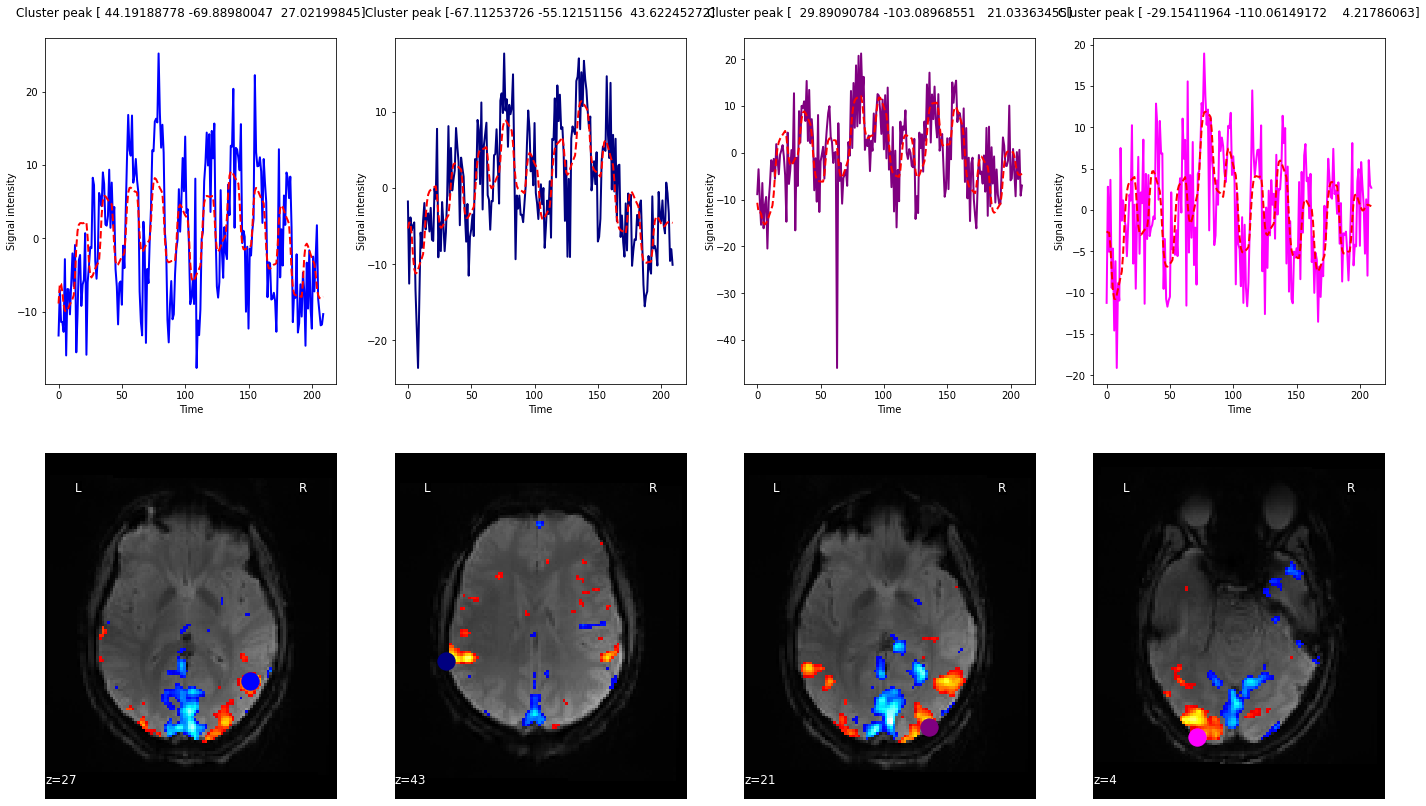

In [20]:
events_ = pd.read_table('/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project/task-eegfmriNF_events.tsv')
#events_ = pd.read_table('C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen/task-eegfmriNF_events.tsv')

fild_to_study='_task-eegfmriNF_bold.nii.gz'
subject_code=[101,102,103,104,105,106,107,108,109,110]


Act_Rrest (data_folder,subject_code,events_,fild_to_study)

#### fMRI file

In [ ]:
events_ = pd.read_table('/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project/task-fmriNF_events.tsv')
#events_ = pd.read_table('C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen/task-fmriNF_events.tsv')
events_=events_.drop(labels=[20], axis=0)

fild_to_study='_task-fmriNF_bold.nii.gz'
subject_code=[101,102,103,104,105,106,107,108,109,110]

Act_Rrest (data_folder,subject_code,events_,fild_to_study)

#### Motorloc file

In [ ]:
events_ = pd.read_table('/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project/task-motorloc_events.tsv')
#events_ = pd.read_table('C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen/task-motorloc_events.tsv')

fild_to_study='_task-motorloc_bold.nii.gz'
subject_code=[101,102,103,104,105,106,107,108,109,110]

events=events_.replace({'Task-ME':'Task-NF'})
Act_Rrest (data_folder,subject_code,events,fild_to_study)

#### EEG file

In [ ]:
events_ = pd.read_table('/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project/task-eegNF_events.tsv')
#events_ = pd.read_table('C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen/task-eegNF_events.tsv')

fild_to_study='_task-eegNF_bold.nii.gz'
subject_code=[101,103,104,105,106,107,108,109,110]

Act_Rrest (data_folder,subject_code,events_,fild_to_study)

### Atlas study and correlation matrix

In [21]:
def Conn (data_folder,subject_code,events_,fildd):
    
    for i in  subject_code:
        subject_folder='/sub-xp'
        String_contrinuation1='/func/sub-xp'
        String_contrinuation2=fildd
        subject_codee=str(i)
    
        subject_data=data_folder+subject_folder+subject_codee+String_contrinuation1+subject_codee+String_contrinuation2;
        

        fmri_img, affine, img = load_nifti(subject_data , return_img=True);
        
        fmri_rest=[];
        fmri_rest_todos=[];
        
        if fildd=='_task-motorloc_bold.nii.gz':
            r1=range(1,161,20);
            r2=range(11,171,20);
        
        else: 
            r1=range(1,201,20);
            r2=range(11,211,20);
            

        
        for rest in r1:

            fmri_rest=fmri_img[:,:,:,rest+2:rest+8];

            if rest==1:
                fmri_rest_todos=fmri_rest;


            else:
                fmri_rest_todos= np.concatenate((fmri_rest_todos,fmri_rest), axis=3);
        
        fmri_task=[];
        fmri_task_todos=[];

        for task in r2:

            fmri_task=fmri_img[:,:,:,task+2:task+8];

            if task==11:
                fmri_task_todos=fmri_task;


            else:
                fmri_task_todos= np.concatenate((fmri_task_todos,fmri_task), axis=3);
        

        fmri_rest_todos=nib.Nifti1Image(fmri_rest_todos,affine);  
        fmri_task_todos=nib.Nifti1Image(fmri_task_todos,affine);  

        mean_img_rest = image.mean_img(fmri_rest_todos);

        mean_img_task = image.mean_img(fmri_task_todos);


        
        dataset = datasets.fetch_atlas_msdl(); 
        atlas_filename = dataset.maps;
        labels = dataset.labels;


        masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True,
                                 memory='nilearn_cache', verbose=5);

        # Matriz conectividad rest
        time_series = masker.fit_transform(fmri_rest_todos); 
        correlation_measure = ConnectivityMeasure(kind='correlation');
        correlation_matrix = correlation_measure.fit_transform([time_series])[0];
        np.fill_diagonal(correlation_matrix, 0);
        

         # Matriz conectividad task
        time_series_task = masker.fit_transform(fmri_task_todos); 
        correlation_measure_task = ConnectivityMeasure(kind='correlation');
        correlation_matrix_task = correlation_measure.fit_transform([time_series_task])[0];
        np.fill_diagonal(correlation_matrix_task, 0);
       
        # Cerebros rest
        
        coords = dataset.region_coords;

        
        # Cerebros task
        
        coords = dataset.region_coords;
    

        #PLOTS
        
        fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(30, 10));

        plotting.plot_matrix(correlation_matrix, labels=labels, colorbar=True,
                             vmax=0.9, vmin=-0.9,axes=ax[1,0]); 
        title1='Rest correlation matrix'+subject_codee;
        ax[1, 0].set_title(title1, fontsize=15);
        
        plotting.plot_matrix(correlation_matrix_task, labels=labels, colorbar=True,
                             vmax=0.9, vmin=-0.9,axes=ax[1, 1]);
        title2='Task correlation matrix'+subject_codee;
        ax[1,1].set_title(title2, fontsize=15);
        
        plotting.plot_connectome(correlation_matrix, coords, edge_threshold="99%", colorbar=True, axes=ax[0,0]);
        title3='Rest connectome'+subject_codee;
        ax[0,0].set_title(title3, fontsize=15);
        
        plotting.plot_connectome(correlation_matrix_task, coords,edge_threshold="99%", colorbar=True,axes= ax[0,1]);
        title4='Task connectome'+subject_codee;
        ax[0,1].set_title(title4, fontsize=15);

        

#### EEG - fMRI file

[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Memory]0.1s, 0.0min    : Loading resample_img...
________________________________________resample_img cache loaded - 0.3s, 0.0min
[Memory]1.0s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
[Memory]1.7s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Memory]0.7s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
[Memory]1.4s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Memory]0.7s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7ff61f275490>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7ff6a1e11910>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, 

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 0.97s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 2.4s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Memory]0.7s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7ff608a3ef70>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7ff609a39100>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, 

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.03s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 2.1s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________resample_img cache loaded - 0.1s, 0.0min
[Memory]0.8s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7ff6a2e74880>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7ff6086e16d0>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.03s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 2.2s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...
________________________________________resample_img cache loaded - 0.1s, 0.0min


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Memory]0.8s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7ff67e0d4fd0>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7ff6a326b1f0>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, 

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 0.97s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 2.4s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...
________________________________________resample_img cache loaded - 0.1s, 0.0min


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Memory]0.8s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7ff69ddbe9a0>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7ff6a2e3d1c0>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, 

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 2.6s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Memory]0.7s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7ff686074220>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7ff67e0d4eb0>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, 

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 2.6s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...
________________________________________resample_img cache loaded - 0.1s, 0.0min


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Memory]0.8s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7ff6a363baf0>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7ff69ddbe880>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, 

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 0.97s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 2.7s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Memory]0.7s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7ff687c5f430>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7ff67876a250>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, 

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 0.98s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 2.9s, 0.0min


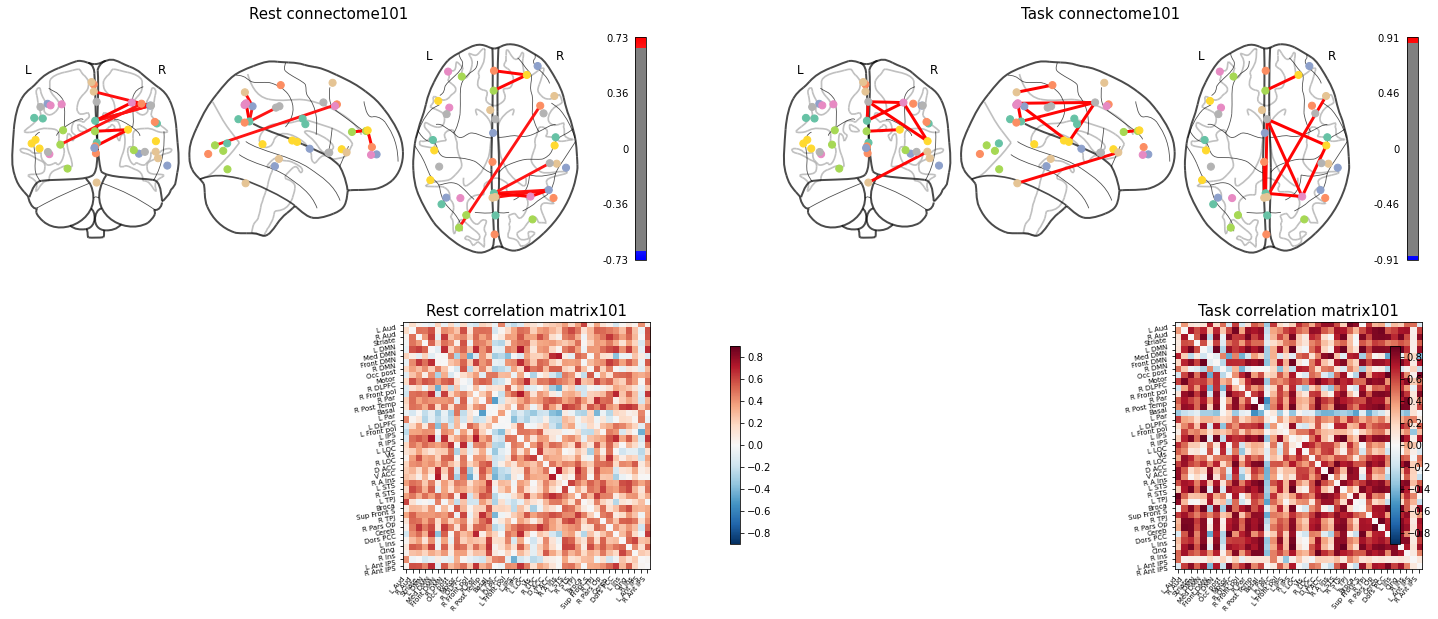

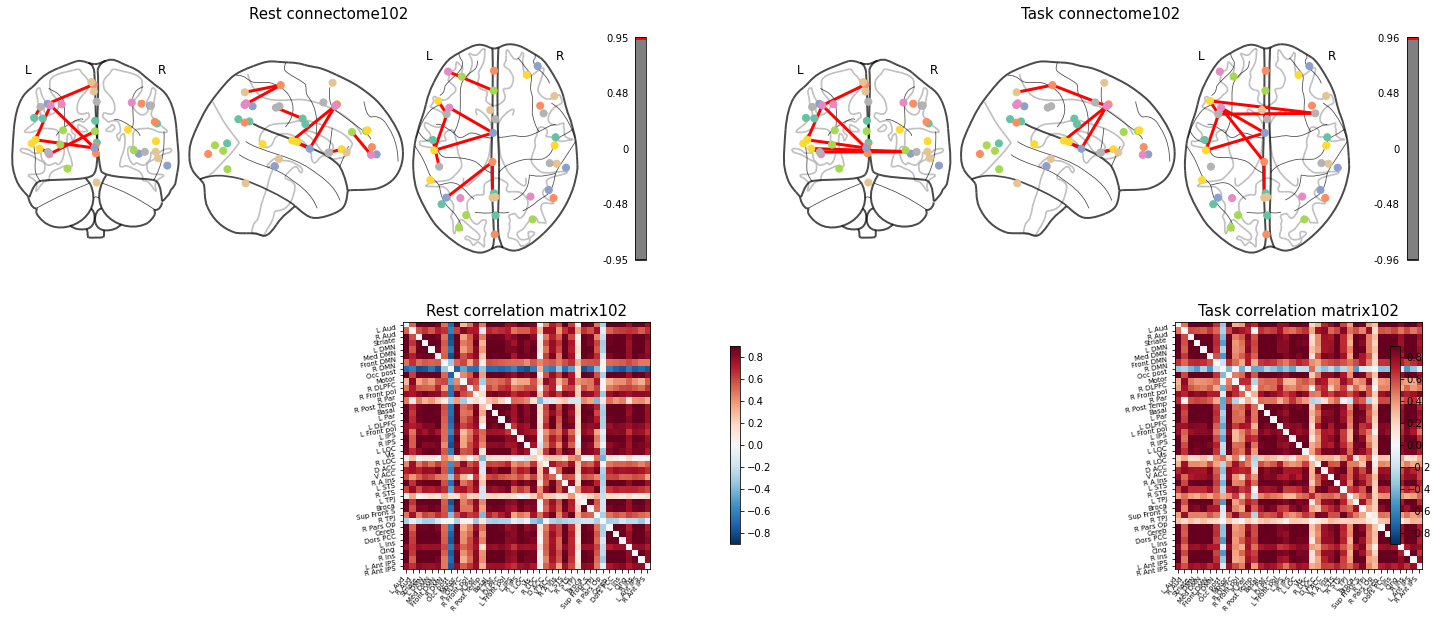

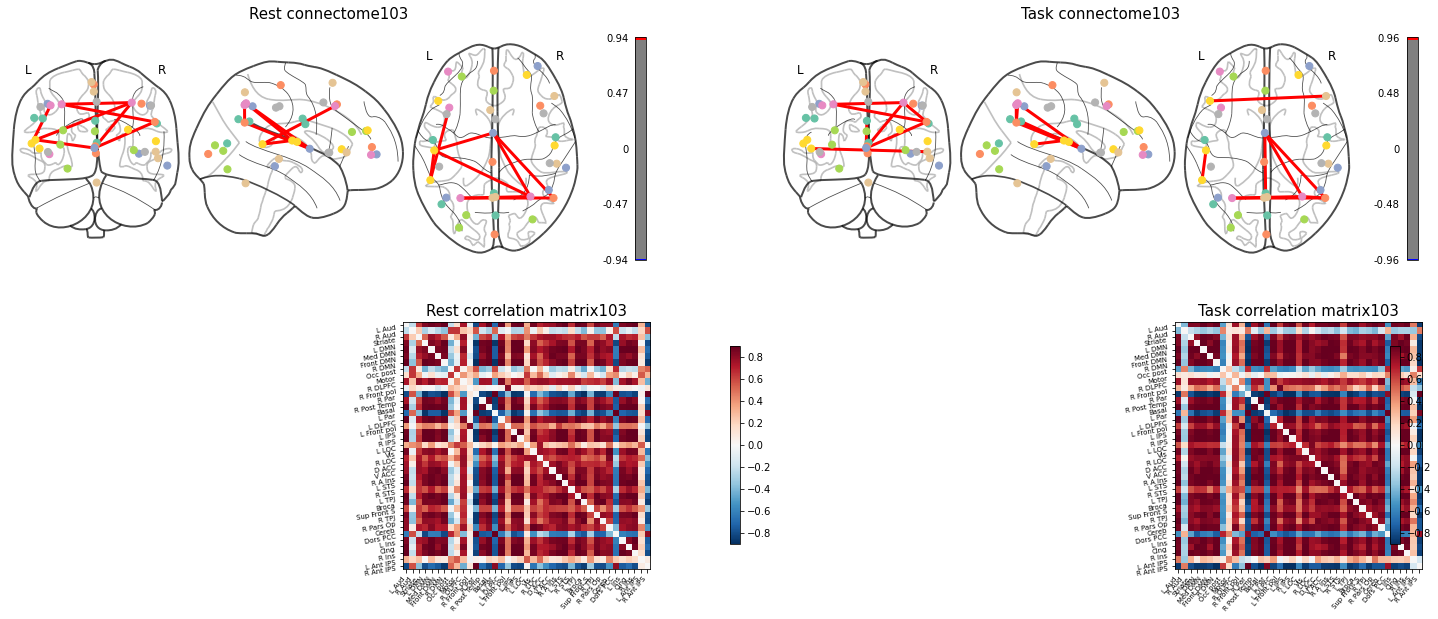

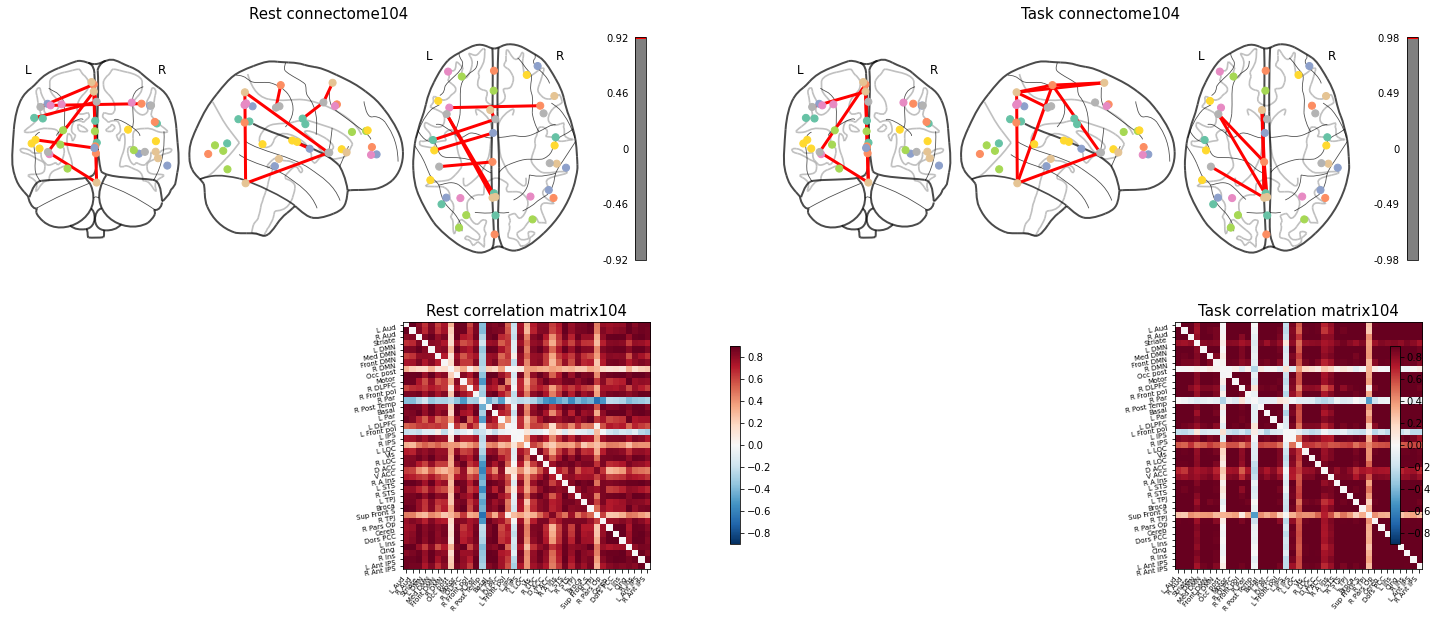

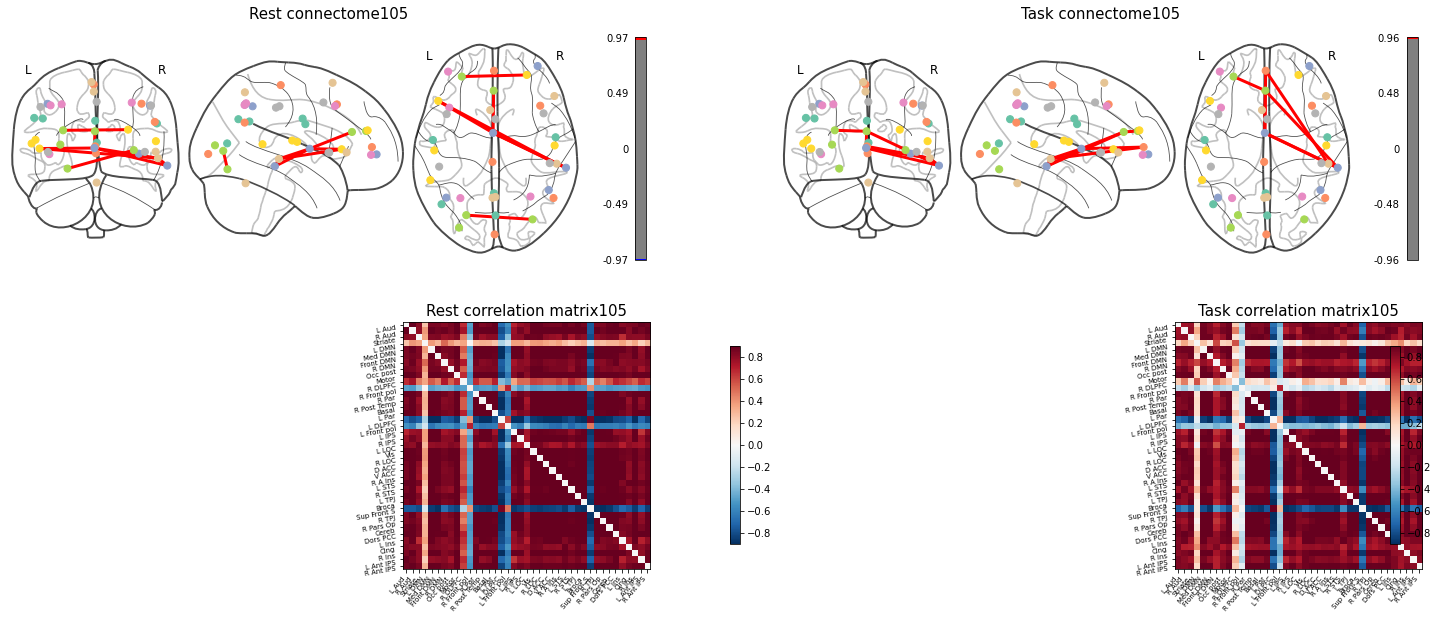

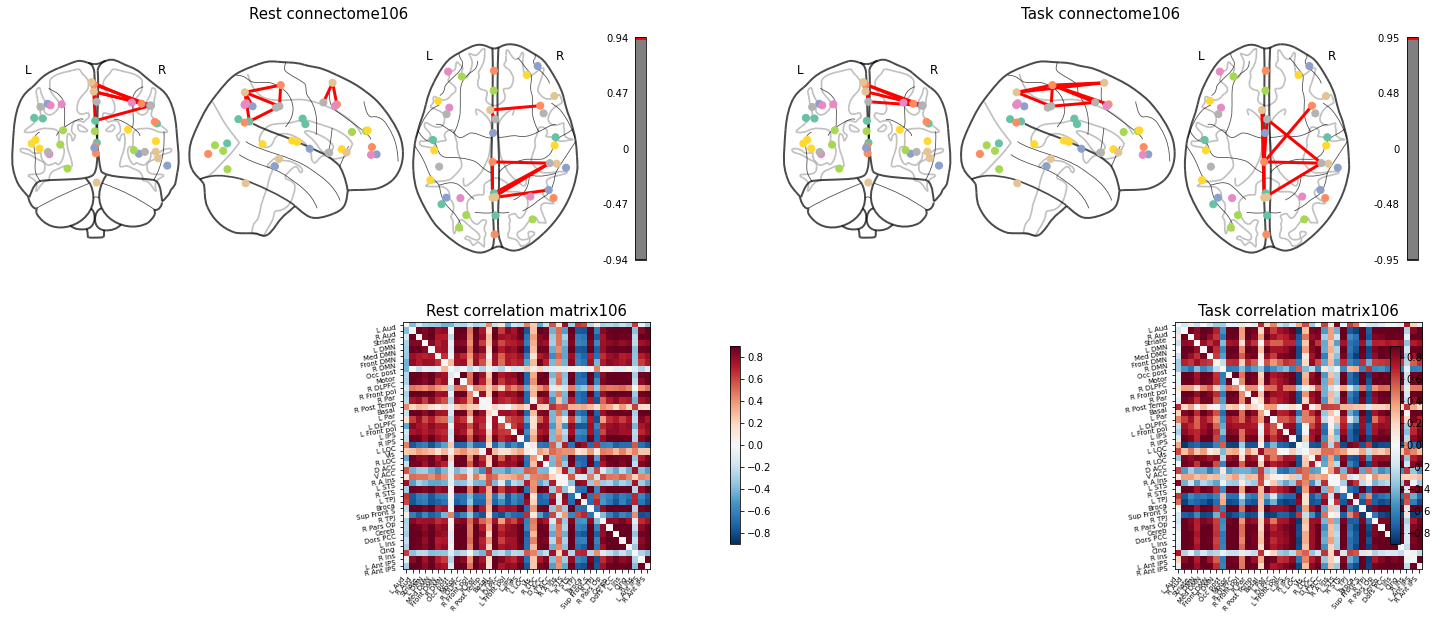

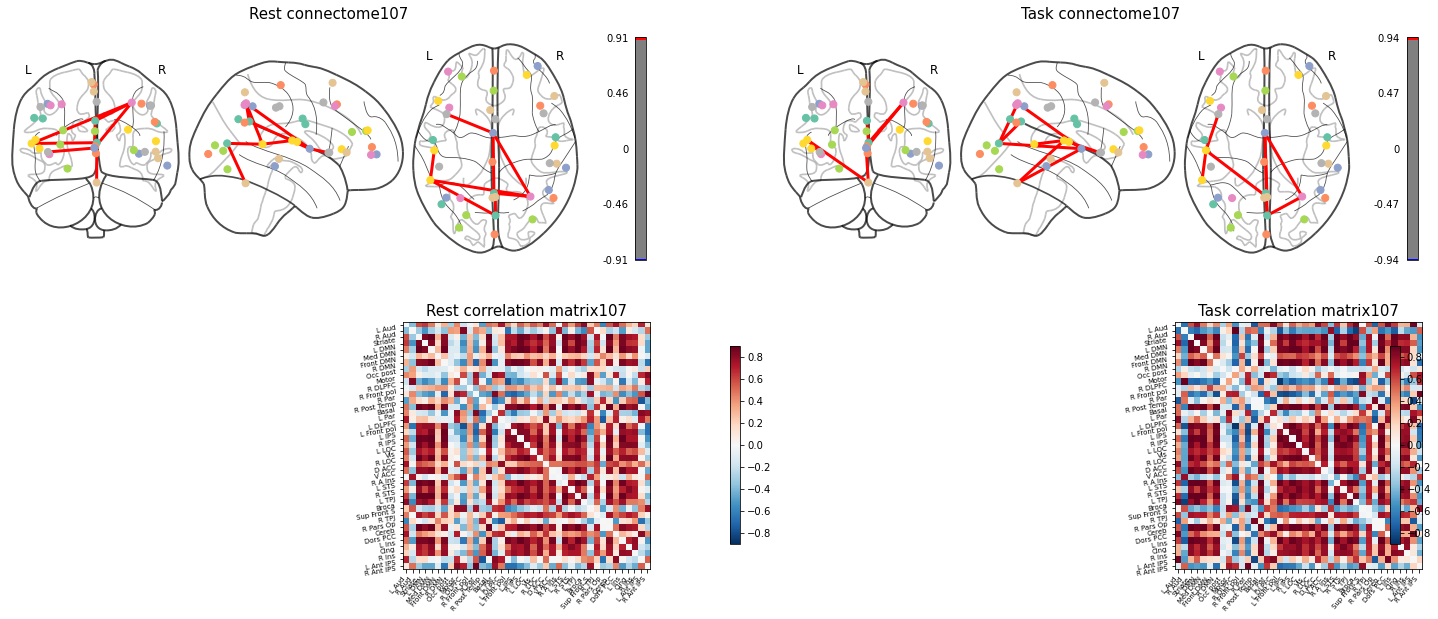

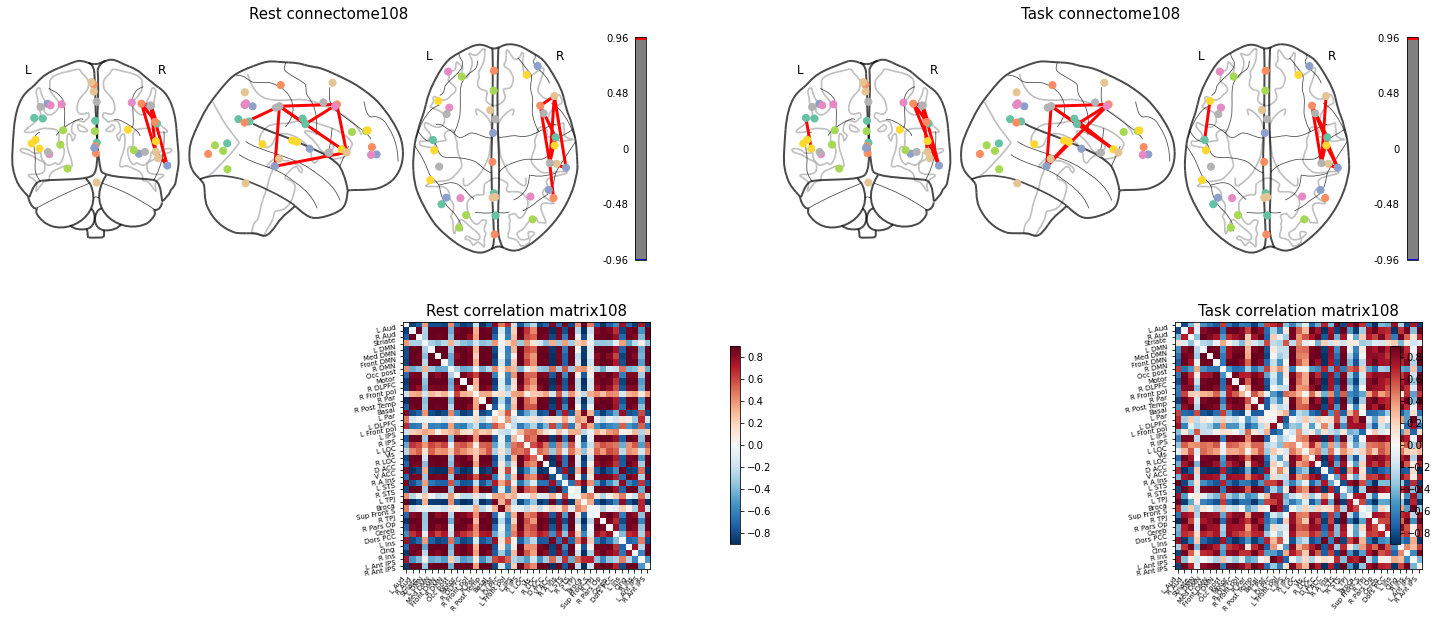

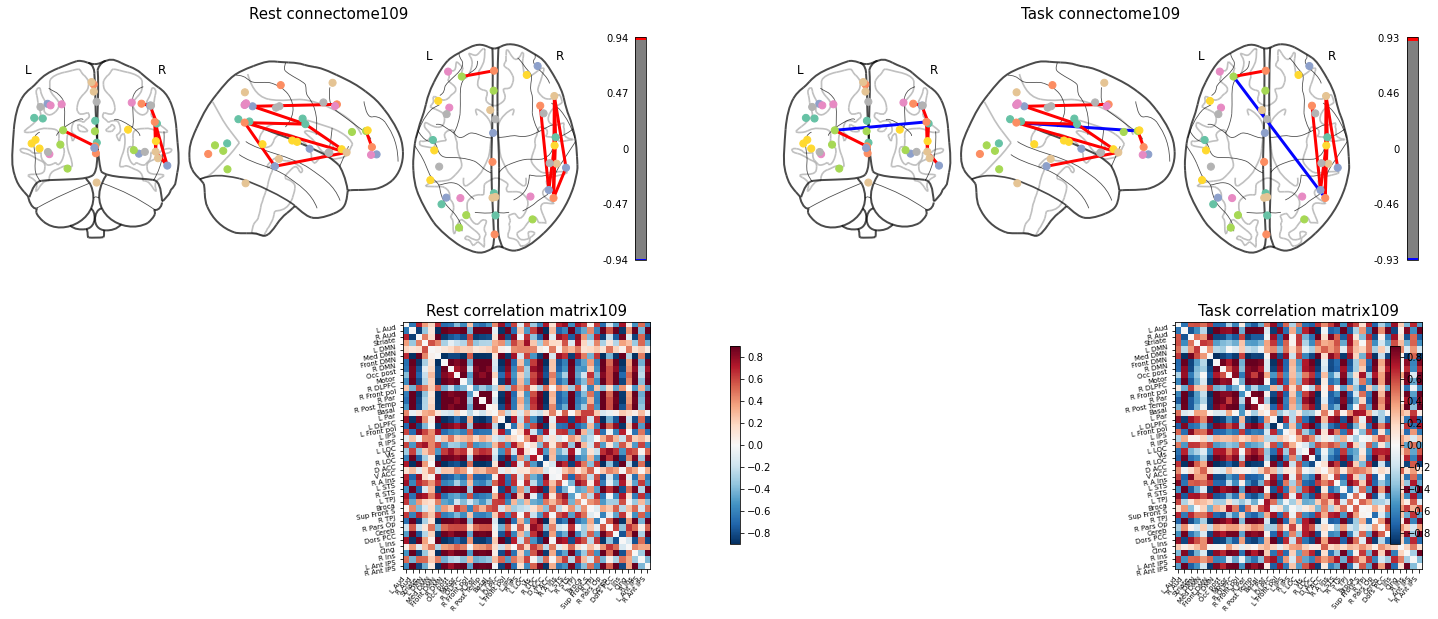

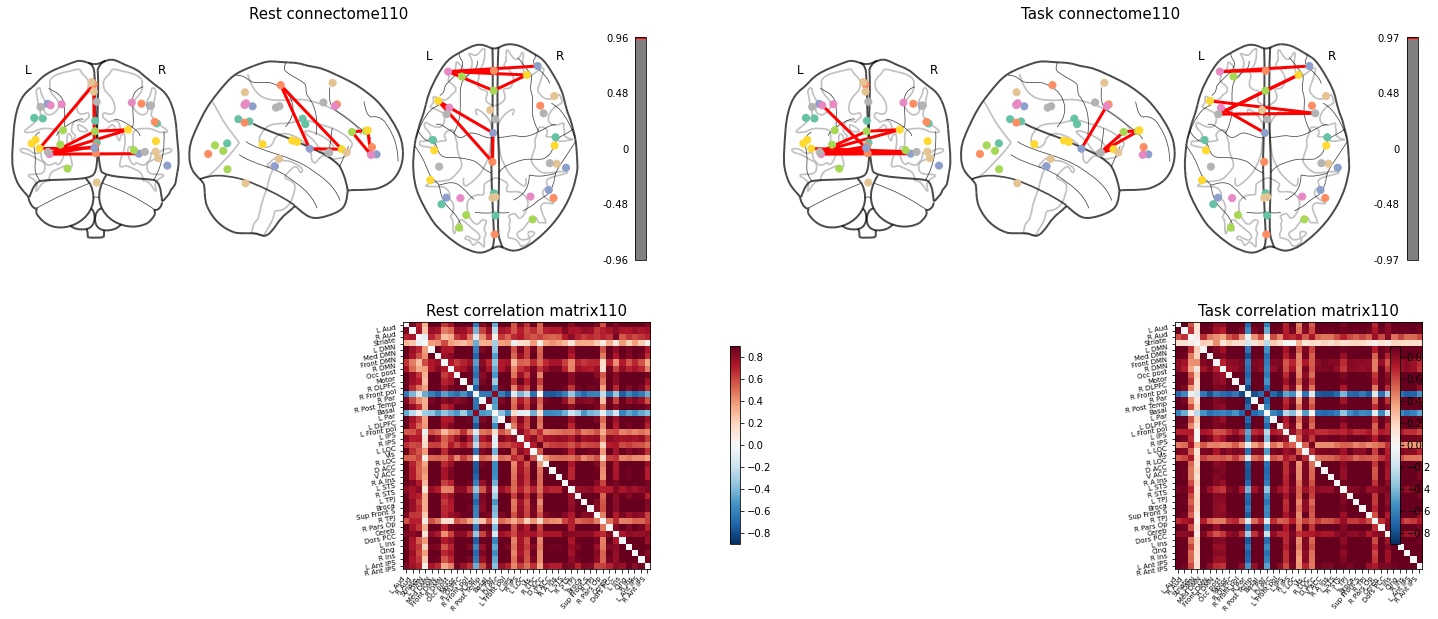

In [22]:
data_folder = '/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project';
#data_folder = 'C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen'
fild_to_study='_task-eegfmriNF_bold.nii.gz';
subject_code=[101,102,103,104,105,106,107,108,109,110];
events_ = pd.read_table('/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project/task-eegfmriNF_events.tsv');

Conn (data_folder,subject_code,events_,fild_to_study);

#### fMRI file

In [ ]:
data_folder = '/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project'
#data_folder = 'C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen'
fild_to_study='_task-fmriNF_bold.nii.gz'
subject_code=[101,102,103,104,105,106,107,108,109,110]
events_ = pd.read_table('/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project/task-fmriNF_events.tsv')

Conn (data_folder,subject_code,events_,fild_to_study)

#### EEG

In [ ]:
data_folder = '/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project'
#data_folder = 'C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen'
fild_to_study='_task-motorloc_bold.nii.gz'
subject_code=[101,102,103,104,105,106,107,108,109,110]
events_ = pd.read_table('/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project/task-eegfmriNF_events.tsv')

Conn (data_folder,subject_code,events_,fild_to_study)

#### Motorloc file

In [ ]:
data_folder = '/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project'
#data_folder = 'C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen'
fild_to_study='_task-motorloc_bold.nii.gz'
subject_code=[101,102,103,104,105,106,107,108,109,110]
events_ = pd.read_table('/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project/task-motorloc_events.tsv')

Conn (data_folder,subject_code,events_,fild_to_study)

The following section will implement the techniques used in the individualized classification to the whole database. 

### Individual analysis for every subject and model

In the first instance, the same function used for subject one will be applied to the rest of the subjects individually. The aim is to analyze if there is any of the subjects with more predilection to show differences between both sets (task and rest). In addition, the efficiency of the selected models can be compared.

In [ ]:
data_folder = '/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project'
#data_folder = 'C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen'

In [ ]:
def Classificationbuilder (data_folder,subject_code,fildd,n_components,ANNlayers,model_code):
     for i in  subject_code:
        print("Subject analyzed: {:.3f}".format(i))
        subject_folder='/sub-xp'
        String_contrinuation1='/func/sub-xp'
        String_contrinuation2=fildd
        subject_codee=str(i)
        
        subject_data=data_folder+subject_folder+subject_codee+String_contrinuation1+subject_codee+String_contrinuation2
        
        fmri_img, affine, img = load_nifti(subject_data , return_img=True)
        
        fmri_rest=[]
        fmri_rest_todos=[]
        
        if fildd=='_task-motorloc_bold.nii.gz':
            r1=range(1,161,20)
            r2=range(11,171,20)
        
        else: 
            r1=range(1,201,20)
            r2=range(11,211,20)
        
        for rest in r1:
            fmri_rest=fmri_img[:,:,:,rest:rest+10]
            if rest==1:
                fmri_rest_todos=fmri_rest
            else:
                fmri_rest_todos= np.concatenate((fmri_rest_todos,fmri_rest), axis=3)
        fmri_task=[]
        fmri_task_todos=[]

        for task in r2:
            fmri_task=fmri_img[:,:,:,task:task+10]
            if task==11:
                fmri_task_todos=fmri_task
            else:
                fmri_task_todos= np.concatenate((fmri_task_todos,fmri_task), axis=3)
        
        
        if fildd=='_task-motorloc_bold.nii.gz':
            X=np.zeros((160,11236))
            Y=np.zeros((160,1))
            for i in range(0,80,1):
                a=fmri_rest_todos[:,:,15,i]
                X[i,:]=a.flatten()
                Y[i,0]=0
            for i in range(0,80,1):
                a=fmri_task_todos[:,:,15,i]
                X[i+80,:]=a.flatten()
                Y[i+80,0]=1
            
        else:     
            X=np.zeros((200,11236))
            Y=np.zeros((200,1))
            for i in range(0,100,1):
                a=fmri_rest_todos[:,:,15,i]
                X[i,:]=a.flatten()
                Y[i,0]=0
            for i in range(0,100,1):
                a=fmri_task_todos[:,:,15,i]
                X[i+100,:]=a.flatten()
                Y[i+100,0]=1
            
        X_train, X_test, y_train, y_test = train_test_split(
            X, Y, test_size=0.35)
        

        pca = PCA(n_components=n_components, svd_solver='randomized',
                  whiten=True).fit(X_train)
        
        X_train_pca = pca.transform(X_train)
        X_test_pca = pca.transform(X_test)
        
        y_train = column_or_1d(np.ravel(y_train), warn=True)
        y_test = column_or_1d(np.ravel(y_test), warn=True)

        param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
        svm = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
        svm = svm.fit(X_train_pca, y_train)
        
        target_names=np.array(['Rest', 'Task'])
        n_classes=2
        
        y_pred_svm = svm.predict(X_test_pca)
        numerito=accuracy_score(y_test,y_pred_svm)*100
        print("SVC accuracy: {:.3f}%".format(numerito))
        
        lda = LinearDiscriminantAnalysis()
        lda = lda.fit(X_train_pca, y_train)
        y_pred_lda = lda.predict(X_test_pca)

        numerito=accuracy_score(y_test,y_pred_lda)*100
        print("LDA accuracy: {:.3f}%".format(numerito))
        
        dt = DecisionTreeClassifier()
        dt = dt.fit(X_train_pca, y_train)
        y_pred_dt = dt.predict(X_test_pca)
        numerito=accuracy_score(y_test,y_pred_dt)*100
        print("DT accuracy: {:.3f}%".format(numerito))
        
        ann = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(ANNlayers,), random_state=1)
        ann.fit(X_train_pca, y_train)
        y_pred_ann = ann.predict(X_test_pca)
        numerito=accuracy_score(y_test,y_pred_ann)*100
        print("ANN accuracy: {:.3f}%".format(numerito))
        print("\n")

##### EEG - fMRI file

In [ ]:
fild_to_study='_task-eegfmriNF_bold.nii.gz'
subject_code=[101,102,103,104,105,106,107,108,109,110]
Classificationbuilder (data_folder,subject_code,fild_to_study,100,150,101)

The results obtained for each of the subjects individually are very similar to each other. There is no subject that stands out for having an excellent rating. As before, the best results are those obtained with a artifical neural netwrok  model, with SVC remaining the worst alternative. Since we are only showing the accuracy parameter, the information regarding the classification pattern of each of the algorithms remains unknown. However, as it happened with subject 101, probably low rating models (around 50%) does not find differences between both images and tends to group them all in a single class. 

This first study has been performed with the eegfMRI file, so we can understand the low activation levels of the captured images. After testing the different files, it was decided to study in parallel the 'motorloc' set where, in addition to imagining the performance of the task, the movement must also be executed. 

##### MOTORLOC file

In [ ]:
fild_to_study='_task-motorloc_bold.nii.gz'
subject_code=[101,102,103,104,105,106,107,108,109,110]
Classificationbuilder (data_folder,subject_code,fild_to_study,100,150,101)

As can be seen, the results obtained when processing the 'motorloc' file are notably superior to the tests performed with the rest of the files. In this case, some subjects exceed 90% accuracy with concrete models, being the generalized average 75% (while with the rest of the files this statistical parameter is in the 65%). This suggests that brain activity is higher when the task is not only performed mentally, allowing a better clustering of both groups. 

#### Extrapolating the individual subject model

Another of the tests that is going to be carried out is the observation of the results obtained by applying the model generated with a particular subject to the rest of the subjects. For this purpose, the artificial neural network has been selected, since it has previously provided the best results. 

In [ ]:
def Aplication_of_clasiffier2 (data_folder, subject_code, fildd, studiedsubject, n_components, method):
    print("Subject analyzed: {:.3f}".format(studiedsubject))
    subject_folder='/sub-xp'
    String_contrinuation1='/func/sub-xp'
    String_contrinuation2=fildd
    subject_codee=str(studiedsubject)
        
    subject_data=data_folder+subject_folder+subject_codee+String_contrinuation1+subject_codee+String_contrinuation2
        
    fmri_img, affine, img = load_nifti(subject_data , return_img=True)
        
    fmri_rest=[]
    fmri_rest_todos=[]
        
    if fildd=='_task-eegfmriNF_bold.nii.gz':
        r1=range(1,201,20)
        r2=range(11,211,20)
    
    if fildd=='_task-motorloc_bold.nii.gz':
            r1=range(1,161,20)
            r2=range(11,171,20)
        
    for rest in r1:
        fmri_rest=fmri_img[:,:,:,rest:rest+10]
        if rest==1:
            fmri_rest_todos=fmri_rest
        else:
            fmri_rest_todos= np.concatenate((fmri_rest_todos,fmri_rest), axis=3)
    fmri_task=[]
    fmri_task_todos=[]

    for task in r2:
        fmri_task=fmri_img[:,:,:,task:task+10]
        if task==11:
            fmri_task_todos=fmri_task
        else:
            fmri_task_todos= np.concatenate((fmri_task_todos,fmri_task), axis=3)
            
    if fildd=='_task-motorloc_bold.nii.gz':
        X=np.zeros((160,11236))
        Y=np.zeros((160,1))
        for i in range(0,80,1):
            a=fmri_rest_todos[:,:,15,i]
            X[i,:]=a.flatten()
            Y[i,0]=0
        for i in range(0,80,1):
            a=fmri_task_todos[:,:,15,i]
            X[i+80,:]=a.flatten()
            Y[i+80,0]=1
    else:    
        X=np.zeros((200,11236))
        Y=np.zeros((200,1))
        for i in range(0,100,1):
            a=fmri_rest_todos[:,:,15,i]
            X[i,:]=a.flatten()
            Y[i,0]=0
        for i in range(0,100,1):
            a=fmri_task_todos[:,:,15,i]
            X[i+100,:]=a.flatten()
            Y[i+100,0]=1
            
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.35)
        
        
    pca = PCA(n_components=n_components, svd_solver='randomized',
                whiten=True).fit(X_train)
        
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
        
    y_train = column_or_1d(np.ravel(y_train), warn=True)
    y_test = column_or_1d(np.ravel(y_test), warn=True)

    n_classes=2
    
    if method == 'svm':
        param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
            'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
        subjectmodel = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
        subjectmodel = subjectmodel.fit(X_train_pca, y_train)
    
        
        target_names=np.array(['Rest', 'Task'])
        
    
        y_pred_svm = subjectmodel.predict(X_test_pca)
        numerito=accuracy_score(y_test,y_pred_svm)*100
        print("SVC accuracy: {:.3f}".format(numerito))
        
    elif method == 'lda':
        
        subjectmodel = LinearDiscriminantAnalysis()
        subjectmodel = subjectmodel.fit(X_train_pca, y_train)
        y_pred_lda = subjectmodel.predict(X_test_pca)

        numerito=accuracy_score(y_test,y_pred_lda)*100
        print("LDA accuracy: {:.3f}".format(numerito))
        
    elif method == 'dt':
        
        subjectmodel = DecisionTreeClassifier()
        subjectmodel = subjectmodel.fit(X_train_pca, y_train)
        y_pred_dt = subjectmodel.predict(X_test_pca)
        numerito=accuracy_score(y_test,y_pred_dt)*100
        print("DT accuracy: {:.3f}".format(numerito))
        
    elif method == 'ann':
        
        subjectmodel = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(150,), random_state=1)
        subjectmodel.fit(X_train_pca, y_train)
        y_pred_ann = subjectmodel.predict(X_test_pca)
        numerito=accuracy_score(y_test,y_pred_ann)*100
        print("ANN accuracy: {:.3f}".format(numerito))
    
    print("\n")
    
    for i in  subject_code:
        
        print("Subject analyzed: {:.3f}".format(i))
        subject_folder='/sub-xp'
        String_contrinuation1='/func/sub-xp'
        String_contrinuation2=fildd
        subject_codee=str(i)
        
        subject_data=data_folder+subject_folder+subject_codee+String_contrinuation1+subject_codee+String_contrinuation2
        
        fmri_img, affine, img = load_nifti(subject_data , return_img=True)
        
        fmri_rest=[]
        fmri_rest_todos=[]
        
        
        for rest in r1:
            fmri_rest=fmri_img[:,:,:,rest:rest+10]
            if rest==1:
                fmri_rest_todos=fmri_rest
            else:
                fmri_rest_todos= np.concatenate((fmri_rest_todos,fmri_rest), axis=3)
        fmri_task=[]
        fmri_task_todos=[]

        for task in r2:
            fmri_task=fmri_img[:,:,:,task:task+10]
            if task==11:
                fmri_task_todos=fmri_task
            else:
                fmri_task_todos= np.concatenate((fmri_task_todos,fmri_task), axis=3)
                
        if fildd=='_task-motorloc_bold.nii.gz':
            X=np.zeros((160,11236))
            Y=np.zeros((160,1))
            for i in range(0,80,1):
                a=fmri_rest_todos[:,:,15,i]
                X[i,:]=a.flatten()
                Y[i,0]=0
            for i in range(0,80,1):
                a=fmri_task_todos[:,:,15,i]
                X[i+80,:]=a.flatten()
                Y[i+80,0]=1
        else:    
            X=np.zeros((200,11236))
            Y=np.zeros((200,1))
            for i in range(0,100,1):
                a=fmri_rest_todos[:,:,15,i]
                X[i,:]=a.flatten()
                Y[i,0]=0
            for i in range(0,100,1):
                a=fmri_task_todos[:,:,15,i]
                X[i+100,:]=a.flatten()
                Y[i+100,0]=1
            

        
        pca = PCA(n_components=n_components, svd_solver='randomized',
                  whiten=True).fit(X)
        
        X_test_pca = pca.transform(X)
        
        y_test = column_or_1d(np.ravel(Y), warn=True)
        
        y_pred = subjectmodel.predict(X_test_pca)
        numerito=accuracy_score(y_test,y_pred)*100
        print("Model accuracy: {:.3f}%".format(numerito))

##### EEG - fMRI file

In [ ]:
fild_to_study='_task-eegfmriNF_bold.nii.gz'
subject_code=[101,102,103,104,105,106,107,108,109,110]

Aplication_of_clasiffier2 (data_folder, subject_code, fild_to_study, 101, 100, 'ann')

##### MOTORLOC file

In [ ]:
fild_to_study='_task-motorloc_bold.nii.gz'
subject_code=[101,102,103,104,105,106,107,108,109,110]

Aplication_of_clasiffier2 (data_folder, subject_code, fild_to_study, 109, 100, 'ann')

The results obtained in this study are very poor, perhaps a more specific treatment of the data should be done, or the model should be adapted with certain conditions, prior to its application on a different set of images. 

In any case, it is surprising that when dealing with the 'EEG-fMRI' file, the extrapolation of the results obtained on the same subject with which the model has been created (i.e., repeating the testing process but on the total set of the subject's data), the prediction result obtained is significantly lower than that obtained initially. This does not occur when the file studied is the 'motorloc'. 

#### Classifying all slices  

Next, it has been decided to join the slides of the total set of subjects into a single vector. This generates a model that contains the whole database. In the first instance, this whole set of slices will be introduced directly into our model, thus being able to observe the response of our system to a large set of data with minimal differences. 

In [ ]:
def Subjects_classification_allslides (data_folder,subject_code,fildd,n_components,ANNlayers):
    
    fmri_rest_todos=[]
    fmri_task_todos=[]
    
    for i in  subject_code:
        if i == subject_code[round(len(subject_code)/2)]:
            print("Half subjects averaged, no time for a coffe")
        subject_folder='/sub-xp'
        String_contrinuation1='/func/sub-xp'
        String_contrinuation2=fildd
        subject_codee=str(i)
        
        subject_data=data_folder+subject_folder+subject_codee+String_contrinuation1+subject_codee+String_contrinuation2
        
        fmri_img, affine, img = load_nifti(subject_data , return_img=True)
        
        
        fmri_rest=[]
        fmri_task=[]
        
        if fildd=='_task-eegfmriNF_bold.nii.gz':
            r1=range(1,201,20)
            r2=range(11,211,20)
    
        if fildd=='_task-motorloc_bold.nii.gz':
            r1=range(1,161,20)
            r2=range(11,171,20)

        for rest in r1:
            fmri_rest=fmri_img[:,:,:,rest:rest+10]
            if rest==1 and i==subject_code[0]:
                fmri_rest_todos=fmri_rest
            else:
                fmri_rest_todos= np.concatenate((fmri_rest_todos,fmri_rest), axis=3)
      
        for task in r2:
            fmri_task=fmri_img[:,:,:,task:task+10]
            if task==11 and i==subject_code[0]:
                fmri_task_todos=fmri_task
            else:
                fmri_task_todos= np.concatenate((fmri_task_todos,fmri_task), axis=3)
                
    print("\n")
    print("Starting the model generation...")
    
    if fildd=='_task-motorloc_bold.nii.gz':
        X=np.zeros((1600,11236))
        Y=np.zeros((1600,1))
        for i in range(0,800,1):
            a=fmri_rest_todos[:,:,15,i]
            X[i,:]=a.flatten()
            Y[i,0]=0
        for i in range(0,800,1):
            a=fmri_task_todos[:,:,15,i]
            X[i+800,:]=a.flatten()
            Y[i+800,0]=1
    else:    
        X=np.zeros((2000,11236))
        Y=np.zeros((2000,1))
        for i in range(0,1000,1):
            a=fmri_rest_todos[:,:,15,i]
            X[i,:]=a.flatten()
            Y[i,0]=0
        for i in range(0,1000,1):
            a=fmri_task_todos[:,:,15,i]
            X[i+1000,:]=a.flatten()
            Y[i+1000,0]=1
            
    X_train, X_test, y_train, y_test = train_test_split(
            X, Y, test_size=0.35)
        

    pca = PCA(n_components=n_components, svd_solver='randomized',
                  whiten=True).fit(X_train)
        
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
        
    y_train = column_or_1d(np.ravel(y_train), warn=True)
    y_test = column_or_1d(np.ravel(y_test), warn=True)

    param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
    svm = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
    svm = svm.fit(X_train_pca, y_train)
        
    target_names=np.array(['Rest', 'Task'])
    n_classes=2
    print("\n")
    print("Classification over the 1000 rest and 1000 task slices:")
        
    y_pred_svm = svm.predict(X_test_pca)
    numerito=accuracy_score(y_test,y_pred_svm)*100
    print("SVC accuracy: {:.3f}%".format(numerito))
        
    lda = LinearDiscriminantAnalysis()
    lda = lda.fit(X_train_pca, y_train)
    y_pred_lda = lda.predict(X_test_pca)

    numerito=accuracy_score(y_test,y_pred_lda)*100
    print("LDA accuracy: {:.3f}%".format(numerito))
        
    dt = DecisionTreeClassifier()
    dt = dt.fit(X_train_pca, y_train)
    y_pred_dt = dt.predict(X_test_pca)
    numerito=accuracy_score(y_test,y_pred_dt)*100
    print("DT accuracy: {:.3f}%".format(numerito))
        
    ann = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(ANNlayers,), random_state=1)
    ann.fit(X_train_pca, y_train)
    y_pred_ann = ann.predict(X_test_pca)
    numerito=accuracy_score(y_test,y_pred_ann)*100
    print("ANN accuracy: {:.3f}%".format(numerito))
    print("\n")        

##### EEG - fMRI file

In [ ]:
fild_to_study='_task-eegfmriNF_bold.nii.gz'
subject_code=[101,102,103,104,105,106,107,108,109,110]

Subjects_classification_allslides(data_folder, subject_code, fild_to_study,200,15)

##### MOTORLOC file

In [ ]:
fild_to_study='_task-motorloc_bold.nii.gz'
subject_code=[101,102,103,104,105,106,107,108,109,110]

Subjects_classification_allslides(data_folder, subject_code, fild_to_study,200,15)

As before, the percentages obtained are notoriously low, i.e., in most cases the difference between the two sets (task and rest) is not being adequately detected. Again, the 'motorloc' file provides slightly better results than those predicted with the other files. 

#### Classifying mean task - rest slices 

Finally, it has been decided to study our data set by averaging the task and rest epochs, reducing notoriously the number of vectors given as input to our model, but theoretically increasing the differentiation between them. 

In [ ]:
def Subjects_classification_epochs (data_folder,subject_code,fildd,n_components,ANNlayers):
    
    fmri_rest_todos=np.zeros((106,106,32,100))
    fmri_task_todos=np.zeros((106,106,32,100))
    count=0
    count2=0
    for i in  range(len(subject_code)):
        if i == round(len(subject_code)/2):
            print("Half subjects averaged, no time for a coffe")
        subject_folder='/sub-xp'
        String_contrinuation1='/func/sub-xp'
        String_contrinuation2=fildd
        subject_codee=str(subject_code[i])
        
        subject_data=data_folder+subject_folder+subject_codee+String_contrinuation1+subject_codee+String_contrinuation2
        
        fmri_img, affine, img = load_nifti(subject_data , return_img=True)
        
        
        fmri_rest=[]
        fmri_task=[]
        
        if fildd=='_task-eegfmriNF_bold.nii.gz':
            r1=range(1,201,20)
            r2=range(11,211,20)
    
        if fildd=='_task-motorloc_bold.nii.gz':
            r1=range(1,161,20)
            r2=range(11,171,20)

        for rest in r1:
            fmri_rest=fmri_img[:,:,:,rest+2:rest+8]
            fmri_rest_mean=np.mean(fmri_rest, axis=3)
            fmri_rest_todos[:,:,:,count]=fmri_rest_mean
            count+=1
      
        for task in r2:
            fmri_task=fmri_img[:,:,:,task+2:task+8]
            fmri_task_mean=np.mean(fmri_task, axis=3)
            fmri_task_todos[:,:,:,count2]=fmri_task_mean
            count2+=1

    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(fmri_rest_todos[:,:,15,30])
    axs[0].set_title('fmri_rest')
    axs[1].imshow(fmri_task_todos[:,:,15,30])
    axs[1].set_title('fmri_task')
    print("\n")

    
    if fildd=='_task-motorloc_bold.nii.gz':
        X=np.zeros((160,11236))
        Y=np.zeros((160,1))
        for i in range(0,80,1):
            a=fmri_rest_todos[:,:,15,i]
            X[i,:]=a.flatten()
            Y[i,0]=0
        for i in range(0,80,1):
            a=fmri_task_todos[:,:,15,i]
            X[i+80,:]=a.flatten()
            Y[i+80,0]=1
    else:    
        X=np.zeros((200,11236))
        Y=np.zeros((200,1))
        for i in range(0,100,1):
            a=fmri_rest_todos[:,:,15,i]
            X[i,:]=a.flatten()
            Y[i,0]=0
        for i in range(0,100,1):
            a=fmri_task_todos[:,:,15,i]
            X[i+100,:]=a.flatten()
            Y[i+100,0]=1
    
    
    
            
    X_train, X_test, y_train, y_test = train_test_split(
            X, Y, test_size=0.35)
        

    pca = PCA(n_components=n_components, svd_solver='randomized',
                  whiten=True).fit(X_train)
        
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
        
    y_train = column_or_1d(np.ravel(y_train), warn=True)
    y_test = column_or_1d(np.ravel(y_test), warn=True)

    param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
    svm = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
    svm = svm.fit(X_train_pca, y_train)
        
    target_names=np.array(['Rest', 'Task'])
    n_classes=2
        
    y_pred_svm = svm.predict(X_test_pca)
    numerito=accuracy_score(y_test,y_pred_svm)*100
    print("SVC accuracy: {:.3f}%".format(numerito))
        
    lda = LinearDiscriminantAnalysis()
    lda = lda.fit(X_train_pca, y_train)
    y_pred_lda = lda.predict(X_test_pca)

    numerito=accuracy_score(y_test,y_pred_lda)*100
    print("LDA accuracy: {:.3f}%".format(numerito))
        
    dt = DecisionTreeClassifier()
    dt = dt.fit(X_train_pca, y_train)
    y_pred_dt = dt.predict(X_test_pca)
    numerito=accuracy_score(y_test,y_pred_dt)*100
    print("DT accuracy: {:.3f}%".format(numerito))
        
    ann = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(ANNlayers,))
    ann.fit(X_train_pca, y_train)
    y_pred_ann = ann.predict(X_test_pca)
    numerito=accuracy_score(y_test,y_pred_ann)*100
    print("ANN accuracy: {:.3f}%".format(numerito))
    print("\n")       

##### EEG-fMRI file

In [ ]:
fild_to_study='_task-eegfmriNF_bold.nii.gz'
subject_code=[101,102,103,104,105,106,107,108,109,110]

Subjects_classification_epochs(data_folder, subject_code, fild_to_study,110,15)

##### MOTORLOC file

In [ ]:
fild_to_study='_task-motorloc_bold.nii.gz'
subject_code=[101,102,103,104,105,106,107,108,109,110]

Subjects_classification_epochs(data_folder, subject_code, fild_to_study,100,15)

Unexpectedly, the results obtained with this technique are very poor. Classification of our dataset is around 70% in the best scenario for the 'motorloc' file. This indicates that individual patient differences make it difficult to extrapolate a generalised model. Also, the fMRI imaging technique is not the best at capturing different levels of activation.  To improve this study, a more aggressive pre-processing of the images should be carried out, where the existing differences due to brain activation would be clearly marked. Likewise, each of the subjects should be adapted to a common space that allows for comparison, given that the different anatomy presented by each of the patients is one of the problems we have encountered when analysing our database. Possible solutions to this problem could be to extract parameters from the images with different processing techniques, in order to work directly with information that correctly classify our groups. 



# EEG

## Importing data

In [ ]:
data_raw=mne.io.read_raw_brainvision('C:/Users/Alex/Documents/UPC/Q2/Neuroimatge/Final Project/ds002336-download/sub-xp101/eeg/sub-xp101_task-motorloc_eeg.vhdr')

In [ ]:
data=mne.io.read_raw_brainvision('C:/Users/Alex/Documents/UPC/Q2/Neuroimatge/Final Project/ds002336-download/derivatives/sub-xp101/eeg_pp/sub-xp101_task-motorloc_eeg_pp.vhdr',preload=True)

## Visualizing the loaded data

In [ ]:
%matplotlib tk 
#for some reason this is needed for the data to plot properly

In [ ]:
data_raw.plot()

In [ ]:
data.plot()

## Further Preprocessing

### Filters & Reference

In [ ]:
data_filt=data.copy().load_data().filter(0.1,30)


In [ ]:
for i in [20,22,24,26,34,40,42,48]:
    print(data.ch_names[i])
#names of the reference channels of the EEG used by the authors in their laplacian filter

In [ ]:
data_reref=data_filt.copy().set_eeg_reference(ref_channels= ["FC1","CP1","FC5","CP5","C1","FC3","CP3","C5"])

### Events

In [ ]:
events=mne.events_from_annotations(data_reref)
events 

In [ ]:
#Create a new channel called stimulation (STI) needed to add the events
stim=mne.create_info(['STI'],200,['stim'])
stim_raw=mne.io.RawArray(np.zeros([1,67388]),stim)
data_reref.load_data().add_channels([stim_raw],force_update_info=True)
data_reref.ch_names[-1]

In [ ]:
data_reref.add_events(events[0],stim_channel='STI',replace=True) #add the events to the data

## Epochs

In [ ]:
event_id = {'task':1,'rest':99}
tmin = 2  # start of each epoch 
tmax = 18  # end of each epoch 
baseline = (2, 3) 

In [ ]:
reject_criteria = dict(eeg=600e-5)      
picks = mne.pick_types(data_reref.info, meg=False, eeg=True, stim=False, misc=True,
                       include=[])

In [ ]:
epochs = mne.Epochs(data_reref, events[0], event_id, tmin, tmax, picks=picks, proj=False,
                    baseline=baseline, reject=reject_criteria)

In [ ]:
epochs.plot()

## Evoked potential

In [ ]:
evoked = epochs['task'].average() #mean of the epochs to get the evoked response
evoked.plot(time_unit='s', gfp=True) #plot of the evoked response
evoked.plot_topomap(times=np.linspace(3, 17, 13), ch_type='eeg',time_unit='s') #topomap

## A new approach

In [ ]:
epochs2= mne.make_fixed_length_epochs(data_reref.copy().crop(tmin=32, tmax=51))

In [ ]:
epochs2.load_data().plot()

In [ ]:
evoked2 = epochs2.average() #mean of the epochs to get the evoked response
evoked2.plot(time_unit='s', gfp=True) #plot of the evoked response